In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('cognizants.csv')

# Preprocessing

df

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Annual Income', 'Occupation', 'AccountBalance',
       'Credit Score(in range of 300,900)', 'Gender', 'Education',
       'Total Active loans', 'Bank Products ', 'Fixed Deposit ', 'Tenure',
       'Transaction in last Month', 'Networth', 'Married', 'Dependents'],
      dtype='object')

In [4]:
df['Bank Products '] = df['Bank Products '].apply(lambda x: len(x.split(',')))

In [5]:
df

Timestamp  Age Annual Income Occupation AccountBalance  \
0    8/3/2024 13:09:04   45        500100   Salaried          50000   
1    8/3/2024 13:09:36   49        480000   Salaried          30000   
2    8/3/2024 13:10:25   37        480000   Salaried          10000   
3    8/3/2024 13:11:20   21        240000   Salaried           5000   
4    8/3/2024 13:12:50   42         35000  Housewife          12500   
..                 ...  ...           ...        ...            ...   
96   8/3/2024 23:46:11   30        720000   Salaried         200000   
97   8/3/2024 23:47:07   55        600000      Other         100000   
98   8/3/2024 23:48:22   28        120000  Housewife          20000   
99   8/3/2024 23:49:15   54        240000      Other           5000   
100  8/4/2024 17:19:48   22             0      Other          30000   

     Credit Score(in range of 300,900)   Gender       Education  \
0                                  760     Male        Graduate   
1                                  750     Male        Graduate   
2                                  710     Male   UnderGraduate   
3                                  700     Male   UnderGraduate   
4                                  800  Female        Graduate    
..                                 ...      ...             ...   
96                                 750     Male   Post Graduate   
97                                 789     Male  Under Graduate   
98                                 786   Female  Under Graduate   
99                                 768   Female  Under Graduate   
100                                500     Male  Under Graduate   

     Total Active loans  Bank Products  Fixed Deposit   Tenure  \
0                     2               5             No      11   
1                     2               3            Yes      10   
2                     0               2            Yes       6   
3                     1               2             No       2   
4                     1               2            Yes       8   
..                  ...             ...            ...     ...   
96                    1               6            Yes      14   
97                    2               3             No      19   
98                    0               1             No       6   
99                    1               2             No      17   
100                   0               1             No       1   

     Transaction in last Month  Networth Married  Dependents  
0                           33    100000     NaN           2  
1                           23    800087     yes           3  
2                           34     30000     yes           4  
3                           25    650000      no           0  
4                           56     10000     yes           3  
..                         ...       ...     ...         ...  
96                          61    400000     yes           2  
97                          24   3700000     yes           3  
98                          65     50599     yes           1  
99                          34    134000     yes           3  
100                         63     21750      no           0  

[101 rows x 16 columns]

In [6]:
df.isnull().sum()

Timestamp                            0
Age                                  0
Annual Income                        0
Occupation                           0
AccountBalance                       0
Credit Score(in range of 300,900)    0
Gender                               0
Education                            0
Total Active loans                   0
Bank Products                        0
Fixed Deposit                        0
Tenure                               0
Transaction in last Month            0
Networth                             0
Married                              1
Dependents                           0
dtype: int64

In [7]:
df.rename(columns={'Bank Products ': 'Bank_Products', 'Fixed Deposit ': 'Fixed Deposit','Total Active loans':'Active_loans','Credit Score(in range of 300,900)':'credit_score','Transaction in last Month':'LastMonthTrans'}, inplace=True)
df

Timestamp  Age Annual Income Occupation AccountBalance  \
0    8/3/2024 13:09:04   45        500100   Salaried          50000   
1    8/3/2024 13:09:36   49        480000   Salaried          30000   
2    8/3/2024 13:10:25   37        480000   Salaried          10000   
3    8/3/2024 13:11:20   21        240000   Salaried           5000   
4    8/3/2024 13:12:50   42         35000  Housewife          12500   
..                 ...  ...           ...        ...            ...   
96   8/3/2024 23:46:11   30        720000   Salaried         200000   
97   8/3/2024 23:47:07   55        600000      Other         100000   
98   8/3/2024 23:48:22   28        120000  Housewife          20000   
99   8/3/2024 23:49:15   54        240000      Other           5000   
100  8/4/2024 17:19:48   22             0      Other          30000   

     credit_score   Gender       Education  Active_loans  Bank_Products  \
0             760     Male        Graduate             2              5   
1             750     Male        Graduate             2              3   
2             710     Male   UnderGraduate             0              2   
3             700     Male   UnderGraduate             1              2   
4             800  Female        Graduate              1              2   
..            ...      ...             ...           ...            ...   
96            750     Male   Post Graduate             1              6   
97            789     Male  Under Graduate             2              3   
98            786   Female  Under Graduate             0              1   
99            768   Female  Under Graduate             1              2   
100           500     Male  Under Graduate             0              1   

    Fixed Deposit  Tenure  LastMonthTrans  Networth Married  Dependents  
0              No      11              33    100000     NaN           2  
1             Yes      10              23    800087     yes           3  
2             Yes       6              34     30000     yes           4  
3              No       2              25    650000      no           0  
4             Yes       8              56     10000     yes           3  
..            ...     ...             ...       ...     ...         ...  
96            Yes      14              61    400000     yes           2  
97             No      19              24   3700000     yes           3  
98             No       6              65     50599     yes           1  
99             No      17              34    134000     yes           3  
100            No       1              63     21750      no           0  

[101 rows x 16 columns]

In [8]:
mode_status = df['Married'].mode()[0]

In [9]:
def handle_nulls(row):
    if pd.isnull(row['Married']) and row['Age'] > 25:
        return mode_status
    return row['Married']

In [10]:
df['Married'] = df.apply(handle_nulls, axis=1)

In [11]:

df.isnull().sum()

Timestamp         0
Age               0
Annual Income     0
Occupation        0
AccountBalance    0
credit_score      0
Gender            0
Education         0
Active_loans      0
Bank_Products     0
Fixed Deposit     0
Tenure            0
LastMonthTrans    0
Networth          0
Married           0
Dependents        0
dtype: int64

In [12]:
df=df.drop(columns='Timestamp',axis=1)

In [13]:
df.dtypes

Age                int64
Annual Income     object
Occupation        object
AccountBalance    object
credit_score       int64
Gender            object
Education         object
Active_loans       int64
Bank_Products      int64
Fixed Deposit     object
Tenure             int64
LastMonthTrans     int64
Networth           int64
Married           object
Dependents         int64
dtype: object

In [14]:
df['Annual Income'] = df['Annual Income'].astype(str).str.replace(',', '').astype(int)


In [15]:
df['AccountBalance'] = df['AccountBalance'].str.replace(',', '').astype(int)

In [16]:
describe_df=df.describe()

In [17]:
df.dtypes

Age                int64
Annual Income      int32
Occupation        object
AccountBalance     int32
credit_score       int64
Gender            object
Education         object
Active_loans       int64
Bank_Products      int64
Fixed Deposit     object
Tenure             int64
LastMonthTrans     int64
Networth           int64
Married           object
Dependents         int64
dtype: object

In [18]:
columns_to_format = ['Active_loans', 'Networth','Annual Income','AccountBalance']
for col in columns_to_format:
    if describe_df[col].dtype in ['float64', 'int64']:
        describe_df[col] = describe_df[col].apply(lambda x: f'{x:.6f}')

In [19]:
describe_df

Age   Annual Income  AccountBalance   credit_score  \
count  101.000000      101.000000      101.000000     101.000000   
mean    38.564356   634443.346535   257249.663366    3095.108911   
std     13.512524   871796.238312   501313.827542   18492.773054   
min     18.000000        0.000000        0.000000      -1.000000   
25%     27.000000   240000.000000    10000.000000     546.000000   
50%     38.000000   500000.000000    70000.000000     700.000000   
75%     49.000000   780000.000000   200000.000000     765.000000   
max     75.000000  7500000.000000  3000000.000000  180000.000000   

         Active_loans  Bank_Products      Tenure  LastMonthTrans  \
count      101.000000     101.000000  101.000000      101.000000   
mean     50892.287129       2.257426   10.207921       37.435644   
std     360971.016656       1.205433    7.714035       17.408283   
min          0.000000       1.000000    1.000000        4.000000   
25%          0.000000       1.000000    4.000000       24.000000   
50%          1.000000       2.000000    9.000000       36.000000   
75%          2.000000       3.000000   15.000000       51.000000   
max    3400000.000000       6.000000   40.000000       70.000000   

              Networth  Dependents  
count       101.000000  101.000000  
mean    2432065.990099    2.782178  
std     3563726.905744    1.847181  
min           0.000000    0.000000  
25%      600050.000000    2.000000  
50%     1600000.000000    3.000000  
75%     3100000.000000    4.000000  
max    30000000.000000    8.000000

# Age 

In [20]:
df['Age'].mean()

38.56435643564357

In [21]:
df['Age'].describe()

count    101.000000
mean      38.564356
std       13.512524
min       18.000000
25%       27.000000
50%       38.000000
75%       49.000000
max       75.000000
Name: Age, dtype: float64

<Axes: >

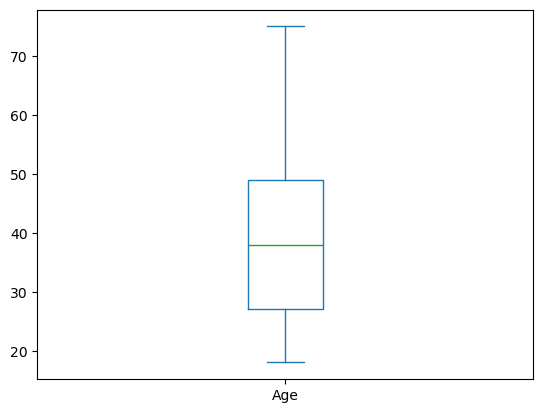

In [22]:
df['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

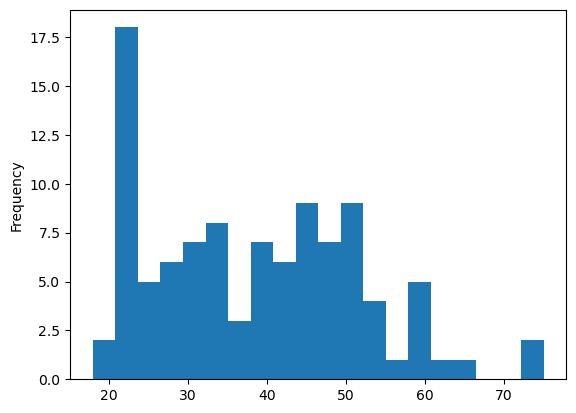

In [23]:
df['Age'].plot(kind='hist',bins=20)

In [24]:
df['Age'].value_counts()


Age
21    12
45     5
50     5
40     5
28     4
60     4
49     4
22     4
30     4
51     3
42     3
46     3
35     3
33     3
43     2
48     2
34     2
55     2
75     2
38     2
31     2
25     2
26     2
23     2
54     2
37     2
29     1
32     1
44     1
27     1
56     1
41     1
24     1
63     1
36     1
47     1
65     1
18     1
52     1
59     1
20     1
Name: count, dtype: int64

In [25]:
df['Annual Income'].mean()

634443.3465346535

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\2509096820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=6)
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

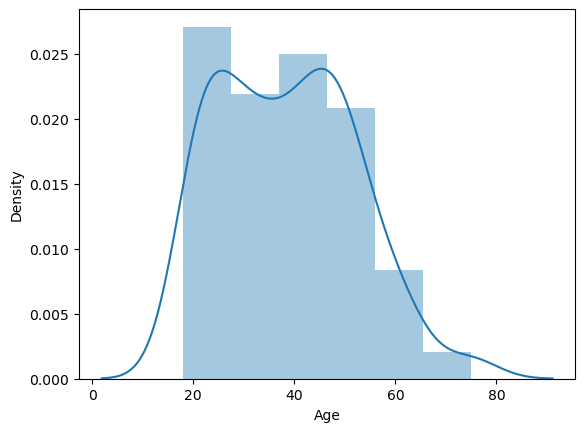

In [26]:
sns.distplot(df['Age'],bins=6)

# Occupation

In [28]:
df['Occupation'].value_counts()

Occupation
Salaried           42
Other              30
Business           21
Housewife           7
Salaried, Other     1
Name: count, dtype: int64

In [33]:
df['Occupation'] = df['Occupation'].replace('Salaried ', 'Salaried')

In [34]:
df['Occupation'].value_counts()

Occupation
Salaried           42
Other              30
Business           21
Housewife           7
Salaried, Other     1
Name: count, dtype: int64

In [35]:
df['Occupation']

Age  Annual Income Occupation  AccountBalance  credit_score   Gender  \
0     45         500100   Salaried           50000           760     Male   
1     49         480000   Salaried           30000           750     Male   
2     37         480000   Salaried           10000           710     Male   
3     21         240000   Salaried            5000           700     Male   
4     42          35000  Housewife           12500           800  Female    
..   ...            ...        ...             ...           ...      ...   
96    30         720000   Salaried          200000           750     Male   
97    55         600000      Other          100000           789     Male   
98    28         120000  Housewife           20000           786   Female   
99    54         240000      Other            5000           768   Female   
100   22              0      Other           30000           500     Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2     UnderGraduate             0              2           Yes       6   
3     UnderGraduate             1              2            No       2   
4         Graduate              1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[101 rows x 15 columns]

In [36]:
# Find rows where 'Occupation' is 'Salaried, Other'
rows_with_salaried_other = df[df['Occupation'] == 'Salaried, Other']

# Display the result
print(rows_with_salaried_other)

    Age  Annual Income       Occupation  AccountBalance  credit_score Gender  \
30   75          24000  Salaried, Other         3000000             0   Male   

   Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
30  Graduate             0              2            No      40   

    LastMonthTrans  Networth Married  Dependents  
30              35   5043455     yes           5  


In [38]:
df.head(34)

Age  Annual Income       Occupation  AccountBalance  credit_score  \
0    45         500100         Salaried           50000           760   
1    49         480000         Salaried           30000           750   
2    37         480000         Salaried           10000           710   
3    21         240000         Salaried            5000           700   
4    42          35000        Housewife           12500           800   
5    37         100000         Business          200000           800   
6    54         480000         Business          100000           750   
7    49        1230000         Salaried          120000           720   
8    21         300000            Other            5000           740   
9    21              0            Other            8000           850   
10   22          10000            Other            5469           720   
11   49         840000         Business           30000           750   
12   45         600000         Business           40000           710   
13   51        1000000         Business          500000           690   
14   23         400000         Salaried          100000           719   
15   26         600000            Other           10000           640   
16   21         120000         Salaried          200000           750   
17   21         350000         Business          400000           700   
18   21              0            Other            4000             0   
19   40        1200000         Salaried           50000           877   
20   60         530000         Salaried          342000        180000   
21   25        2400000         Salaried           10000            -1   
22   31         480000         Business          500000           400   
23   42         840000         Business          120000           798   
24   45         420000         Salaried          200000             0   
25   59         720000         Salaried         2000000           700   
26   33         600000            Other            2000           700   
27   23         240000         Salaried            2000             0   
28   38        1200000         Business         2500000           367   
29   60         840000         Salaried         1800000           355   
30   75          24000  Salaried, Other         3000000             0   
31   26         444000         Salaried          400000           300   
32   50         180000            Other          100000             0   
33   18              0            Other            2000             0   

     Gender       Education  Active_loans  Bank_Products Fixed Deposit  \
0      Male        Graduate             2              5            No   
1      Male        Graduate             2              3           Yes   
2      Male   UnderGraduate             0              2           Yes   
3      Male   UnderGraduate             1              2            No   
4   Female        Graduate              1              2           Yes   
5    Female        Graduate             3              5           Yes   
6      Male   UnderGraduate             0              1            No   
7      Male        Graduate       1200000              3            No   
8      Male   UnderGraduate             2              4           Yes   
9      Male  Under Graduate             3              2            No   
10     Male  Under Graduate             0              1            No   
11     Male        Graduate             2              1           Yes   
12   Female        Graduate             0              2           Yes   
13     Male        Graduate             1              5           Yes   
14   Female   Post Graduate             0              3           Yes   
15   Female        Graduate             0              1           Yes   
16     Male  Under Graduate             0              1           Yes   
17     Male   Post Graduate             2              1           Yes   
18     Male  Under Graduate             0 

In [39]:
df['Occupation'] = df['Occupation'].replace('Salaried, Other', 'Other')

In [40]:
df

Age  Annual Income Occupation  AccountBalance  credit_score   Gender  \
0     45         500100   Salaried           50000           760     Male   
1     49         480000   Salaried           30000           750     Male   
2     37         480000   Salaried           10000           710     Male   
3     21         240000   Salaried            5000           700     Male   
4     42          35000  Housewife           12500           800  Female    
..   ...            ...        ...             ...           ...      ...   
96    30         720000   Salaried          200000           750     Male   
97    55         600000      Other          100000           789     Male   
98    28         120000  Housewife           20000           786   Female   
99    54         240000      Other            5000           768   Female   
100   22              0      Other           30000           500     Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2     UnderGraduate             0              2           Yes       6   
3     UnderGraduate             1              2            No       2   
4         Graduate              1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[101 rows x 15 columns]

In [41]:
df['Occupation'].value_counts()

Occupation
Salaried     42
Other        31
Business     21
Housewife     7
Name: count, dtype: int64

<Axes: xlabel='Occupation'>

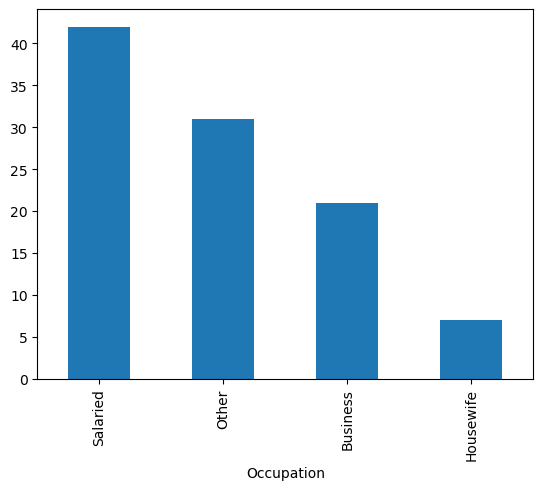

In [42]:
df['Occupation'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

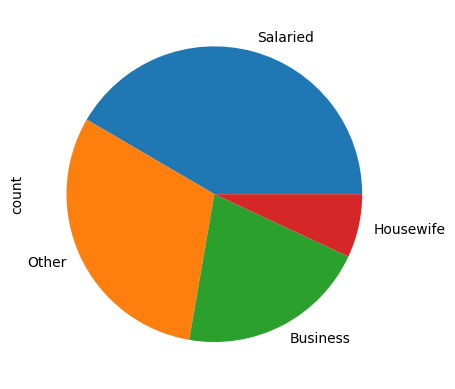

In [43]:
df['Occupation'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

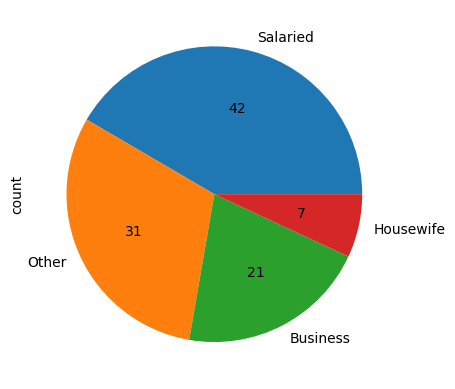

In [44]:
df['Occupation'].value_counts().plot(kind='pie',autopct='%.f')

In [45]:
df['Total_Loan'].isnull().sum()


KeyError: 'Total_Loan'

# MaritalStatus

# Gender	

In [46]:
df['Gender'].value_counts()

Gender
Male       72
Female     28
Female      1
Name: count, dtype: int64

In [49]:
df['Gender'] = df['Gender'].replace('Female ', 'Female')

In [50]:
df['Gender'].value_counts()

Gender
Male      72
Female    29
Name: count, dtype: int64

<Axes: xlabel='Gender'>

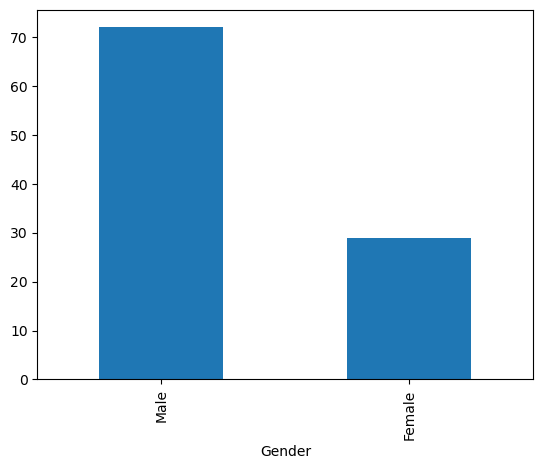

In [51]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

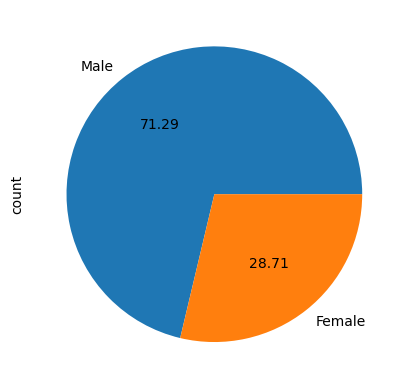

In [52]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [53]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2     UnderGraduate             0              2           Yes       6   
3     UnderGraduate             1              2            No       2   
4         Graduate              1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[101 rows x 15 columns]

# Married

In [54]:
df['Married'].value_counts()

Married
yes    77
no     24
Name: count, dtype: int64

<Axes: xlabel='Married'>

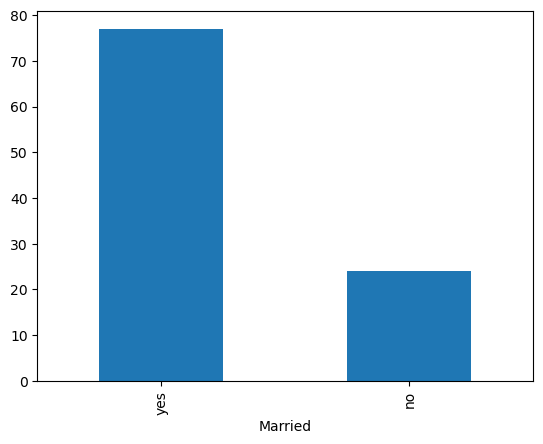

In [55]:
df['Married'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

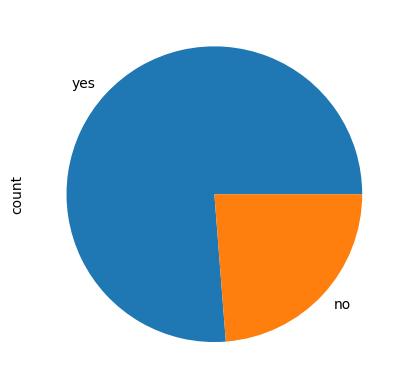

In [56]:
df['Married'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

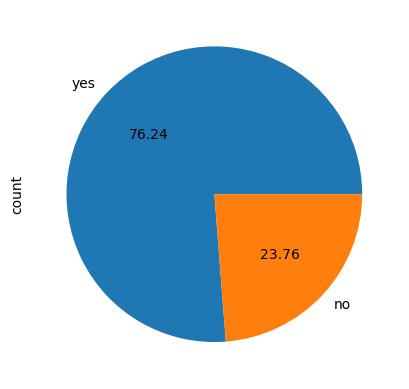

In [57]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f')

# Education

In [58]:
df['Education'].value_counts()

Education
Graduate          41
Under Graduate    39
Post Graduate     16
UnderGraduate      4
Graduate           1
Name: count, dtype: int64

In [59]:
df['Education'] = df['Education'].replace('Graduate ', 'Graduate')
df['Education'] = df['Education'].replace('UnderGraduate', 'Under Graduate')

In [60]:
df['Education'].value_counts()


Education
Under Graduate    43
Graduate          42
Post Graduate     16
Name: count, dtype: int64

<Axes: xlabel='Education'>

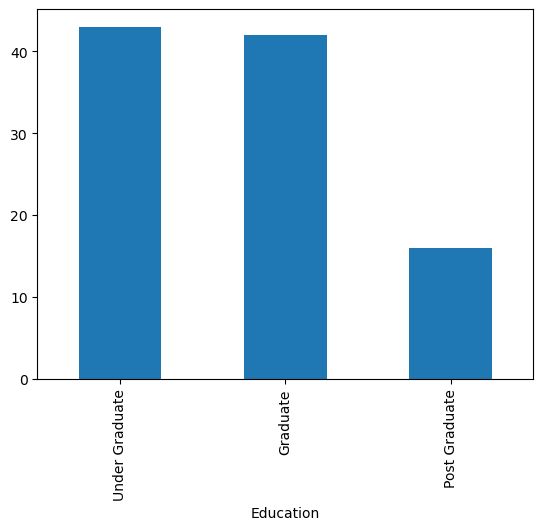

In [61]:
df['Education'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

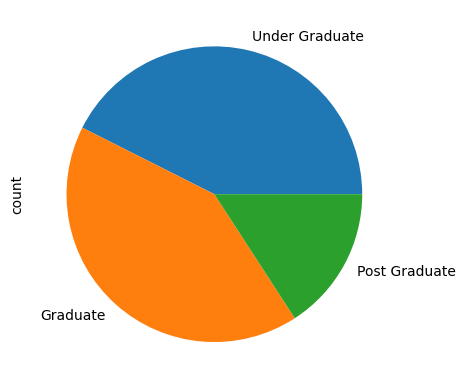

In [62]:
df['Education'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

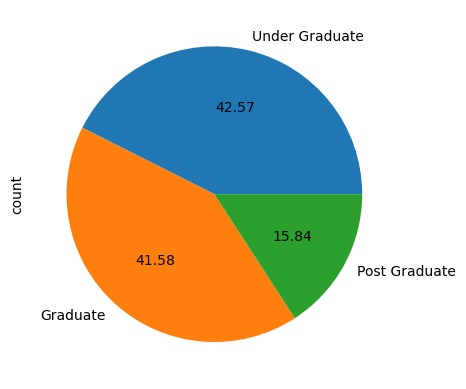

In [63]:
df['Education'].value_counts().plot(kind='pie',autopct='%.2f')

# Active_loans	

In [68]:
df['Active_loans'].value_counts()

Active_loans
0          39
2          26
1          20
3          10
1200000     1
540000      1
10          1
4           1
5           1
3400000     1
Name: count, dtype: int64

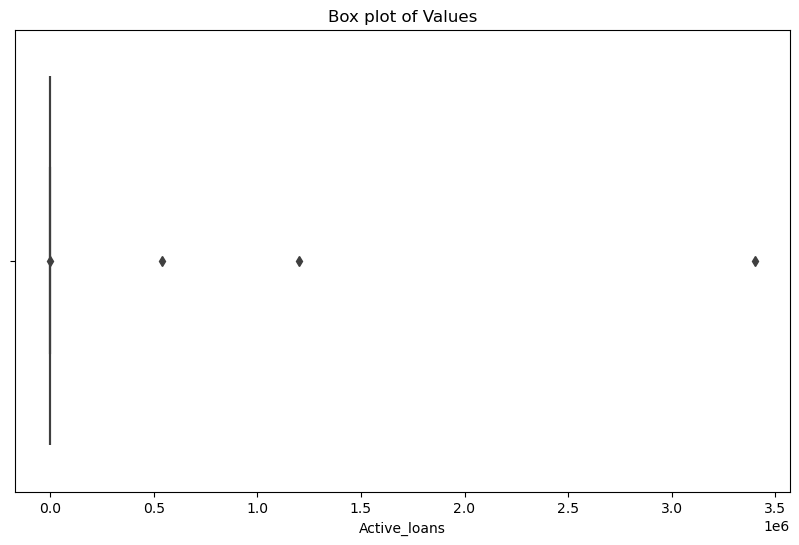

In [65]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values')
plt.show()


In [68]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Active_loans'].quantile(0.25)
Q3 = df['Active_loans'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Active_loans'] < lower_bound) | (df['Active_loans'] > upper_bound)]

print("Outliers:\n", outliers)


Outliers:
     Age  Annual Income Occupation  AccountBalance  credit_score Gender  \
7    49        1230000   Salaried          120000           720   Male   
23   42         840000   Business          120000           798   Male   
52   21         340000      Other             100           700   Male   
79   30         800000   Salaried           10000           851   Male   

         Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
7         Graduate       1200000              3            No      14   
23  Under Graduate        540000              5           Yes      16   
52  Under Graduate            10              2            No       2   
79        Graduate       3400000              1           Yes       6   

    LastMonthTrans  Networth Married  Dependents  
7               58   8700500     yes           3  
23              54    900000     yes           4  
52              13    560000      no           0  
79              49   1000000     yes           3

In [69]:
# Remove outliers
df = df[~((df['Active_loans'] < lower_bound) | (df['Active_loans'] > upper_bound))]

print("DataFrame without outliers:\n", df)


DataFrame without outliers:
      Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Dep

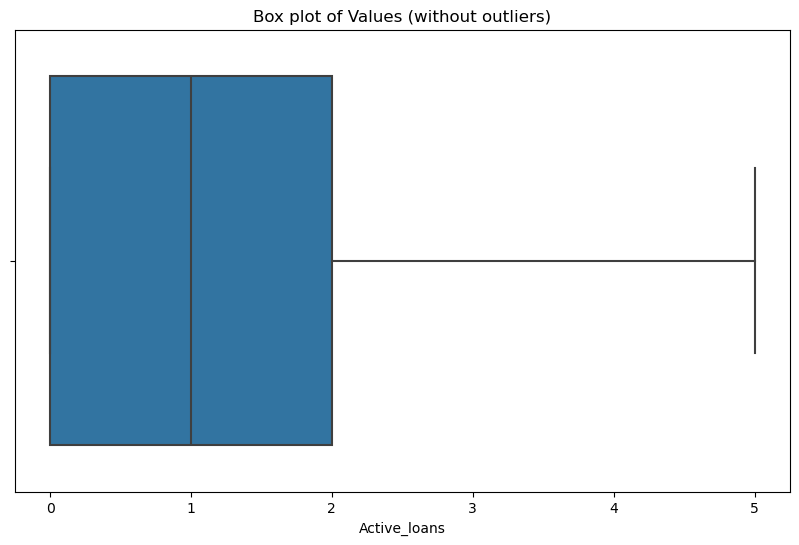

In [70]:
# Create a box plot for the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values (without outliers)')
plt.show()


<Axes: xlabel='Active_loans'>

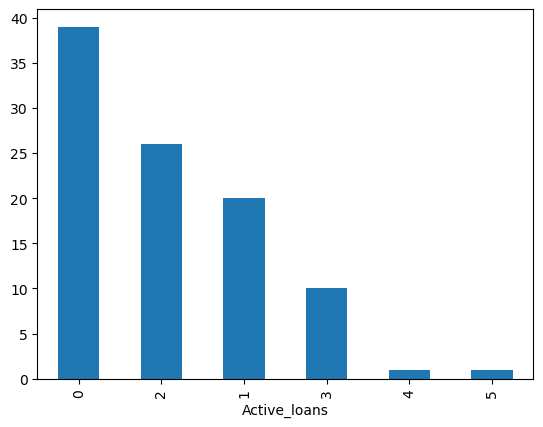

In [71]:
df['Active_loans'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

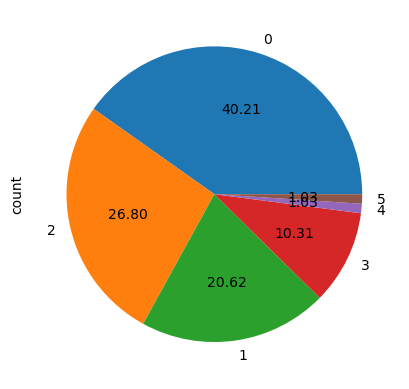

In [72]:
df['Active_loans'].value_counts().plot(kind='pie',autopct='%.2f')

# Bank_Products

In [74]:
df['Bank_Products'].value_counts()

Bank_Products
1    36
3    28
2    23
4     9
5     4
6     1
Name: count, dtype: int64

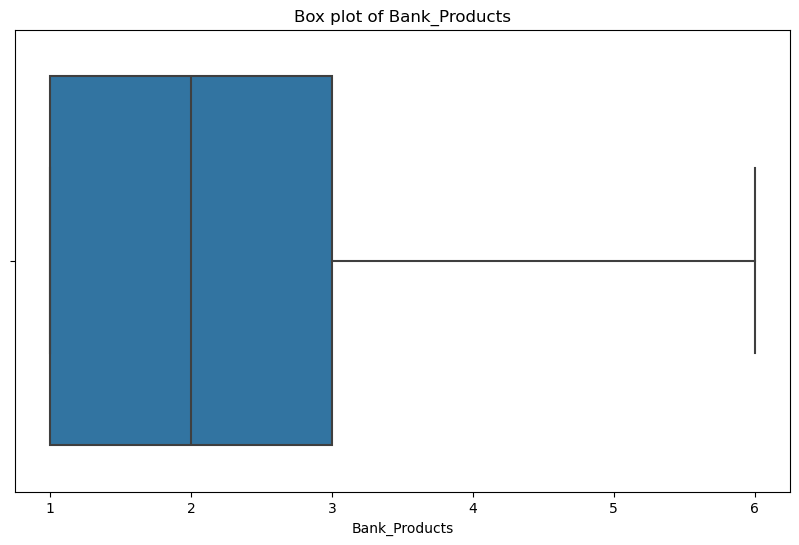

In [73]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Bank_Products'])
plt.title('Box plot of Bank_Products')
plt.show()


<Axes: xlabel='Bank_Products'>

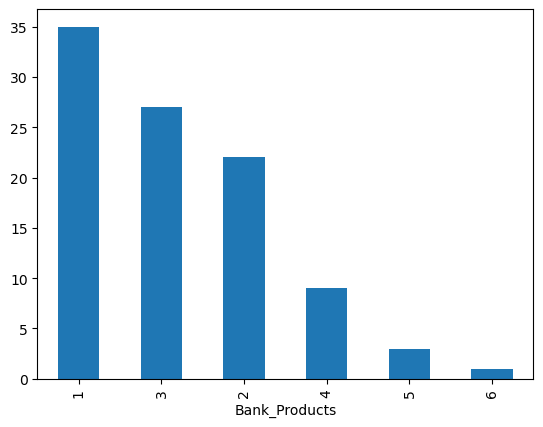

In [74]:
df['Bank_Products'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

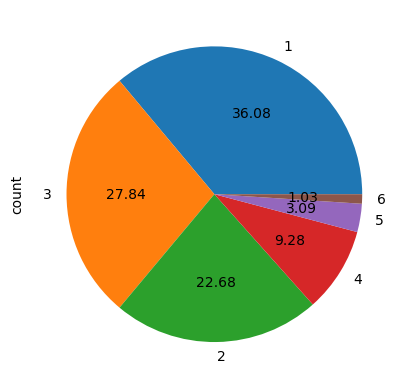

In [75]:
df['Bank_Products'].value_counts().plot(kind='pie',autopct='%.2f')

# Dependents

In [77]:
df['Dependents'].value_counts()

Dependents
3    27
0    19
4    17
2    14
5    13
1     6
6     3
7     1
8     1
Name: count, dtype: int64

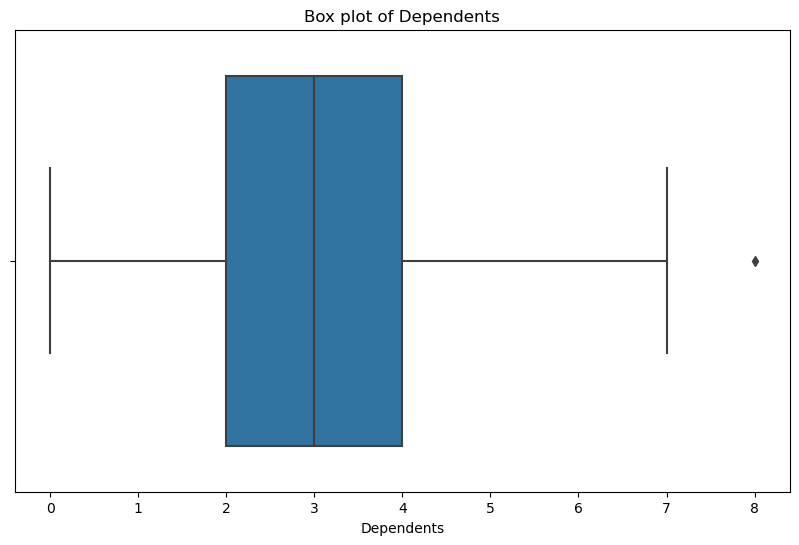

In [76]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Dependents'])
plt.title('Box plot of Dependents')
plt.show()


<Axes: xlabel='Dependents'>

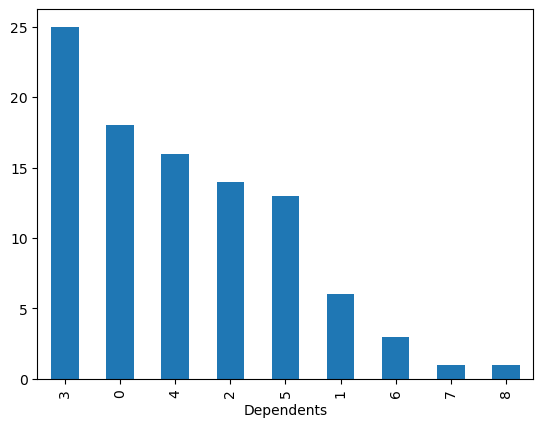

In [77]:
df['Dependents'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

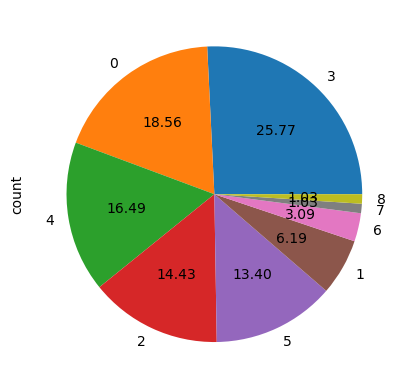

In [78]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f')

# Fixed Deposit	

In [79]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes        51
No         45
Yes, No     1
Name: count, dtype: int64

In [83]:
df['Fixed Deposit'] = df['Fixed Deposit'].replace('Yes, No', 'Yes')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1805927790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fixed Deposit'] = df['Fixed Deposit'].replace('Yes, No', 'Yes')


In [84]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes    52
No     45
Name: count, dtype: int64

<Axes: xlabel='Fixed Deposit'>

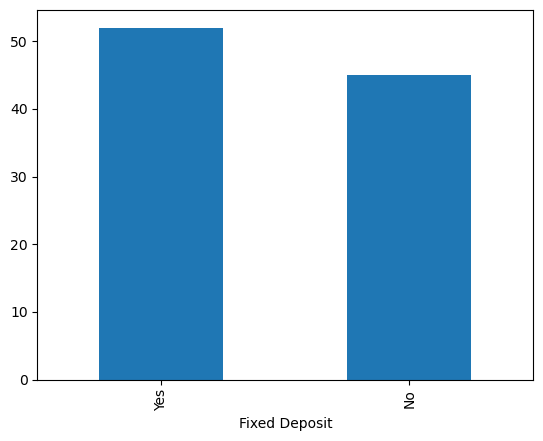

In [85]:
df['Fixed Deposit'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

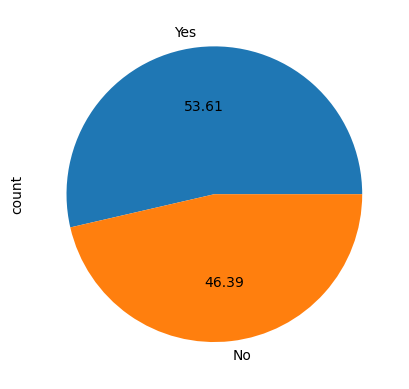

In [86]:
df['Fixed Deposit'].value_counts().plot(kind='pie',autopct='%.2f')

In [99]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[97 rows x 15 columns]

# credit_score

In [100]:
df['credit_score'].value_counts()

credit_score
 750       11
 700       11
 0          9
 800        3
 720        3
 500        2
 786        2
 400        2
 780        2
 10000      2
 1000       2
 850        2
 710        2
 650        2
 423        1
 655        1
 765        1
 589        1
 582        1
 564        1
 760        1
 546        1
 689        1
 433        1
 679        1
 776        1
 5000       1
 50000      1
 600        1
 480        1
 771        1
 789        1
 836        1
 711        1
 565        1
 459        1
 740        1
 690        1
 719        1
 640        1
 877        1
 180000     1
-1          1
 367        1
 355        1
 300        1
 3          1
 378        1
 680        1
 620        1
 414        1
 817        1
 759        1
 568        1
 309        1
 768        1
Name: count, dtype: int64

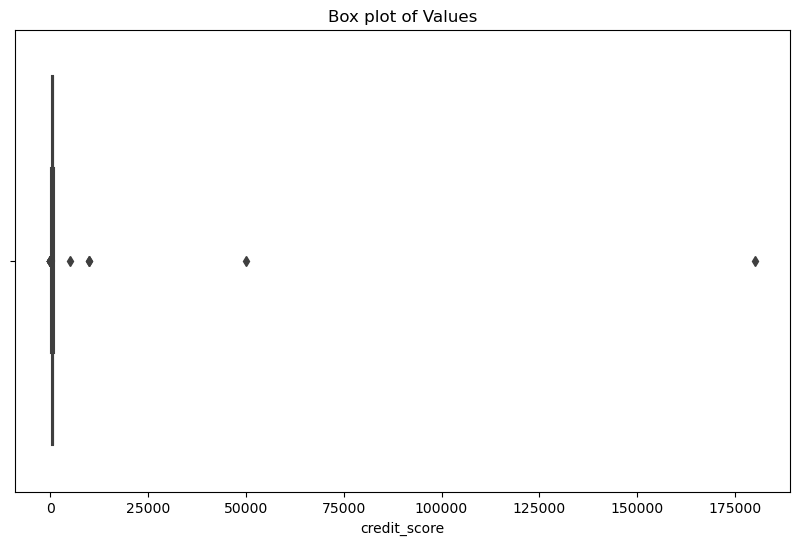

In [101]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Values')
plt.show()


In [102]:
df['credit_score'].describe()

count        97.000000
mean       3191.103093
std       18867.874277
min          -1.000000
25%         500.000000
50%         700.000000
75%         760.000000
max      180000.000000
Name: credit_score, dtype: float64

In [104]:

# Given Q1 and Q3 values
Q1 = 300
Q3 = 900
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')


Lower Bound: -600.0, Upper Bound: 1800.0


In [105]:
# Identify outliers
outliers = df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
     Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
20   60         530000   Salaried          342000        180000    Male   
59   45         300000   Salaried          200000         10000    Male   
82   35         400000   Salaried          200000          5000  Female   
83   50         500000   Business          500000         50000    Male   
84   75          40000      Other           15000         10000    Male   

         Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
20  Under Graduate             1              3           Yes      23   
59  Under Graduate             1              1           Yes      17   
82  Under Graduate             2              1           Yes       5   
83  Under Graduate             2              1            No       6   
84        Graduate             0              2           Yes      21   

    LastMonthTrans  Networth Married  Dependents  
20              43   3000000     yes           5

In [106]:
# Remove outliers
df = df[~((df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound))]
print("DataFrame without outliers:\n", df)

DataFrame without outliers:
      Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Dep

In [107]:
# Given bounds
lower_bound = 300
upper_bound = 900

# Identify outliers
outliers = df[(df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound)]
print("Outliers:\n", outliers)

# Remove outliers
df = df[~((df['credit_score'] < lower_bound) | (df['credit_score'] > upper_bound))]
print("DataFrame without outliers:\n", df)


Outliers:
     Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
18   21              0      Other            4000             0    Male   
21   25        2400000   Salaried           10000            -1  Female   
24   45         420000   Salaried          200000             0    Male   
27   23         240000   Salaried            2000             0  Female   
30   75          24000      Other         3000000             0    Male   
32   50         180000      Other          100000             0    Male   
33   18              0      Other            2000             0    Male   
34   20              0      Other            5000             3    Male   
35   25           2000  Housewife           10000             0  Female   
54   48         600000   Salaried           25000          1000    Male   
81   40         100000  Housewife           10000          1000  Female   
88   21              0      Other               0             0    Male   
89   40       

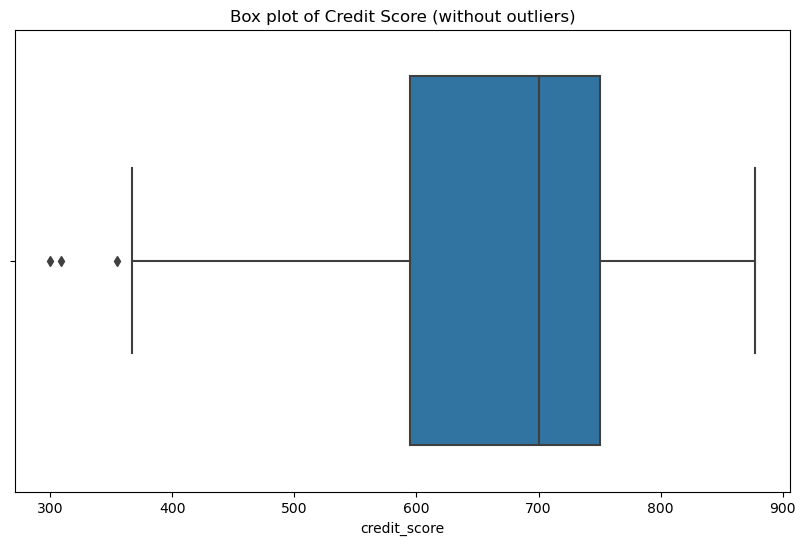

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Credit Score (without outliers)')
plt.show()

In [110]:
df['credit_score'].describe()

count     79.000000
mean     665.000000
std      139.134136
min      300.000000
25%      594.500000
50%      700.000000
75%      750.000000
max      877.000000
Name: credit_score, dtype: float64

In [111]:

# Calculate the mean of the 'credit_score' column
mean_credit_score = df['credit_score'].mean()
print(f"Mean of Credit Score: {mean_credit_score}")


Mean of Credit Score: 665.0


In [117]:
# Define bounds for valid credit scores
min_range = 300
max_range = 850

# Replace outliers with the mean value
df['credit_score'] = df['credit_score'].apply(
    lambda x: mean_credit_score if x < min_range or x > max_range else x
)

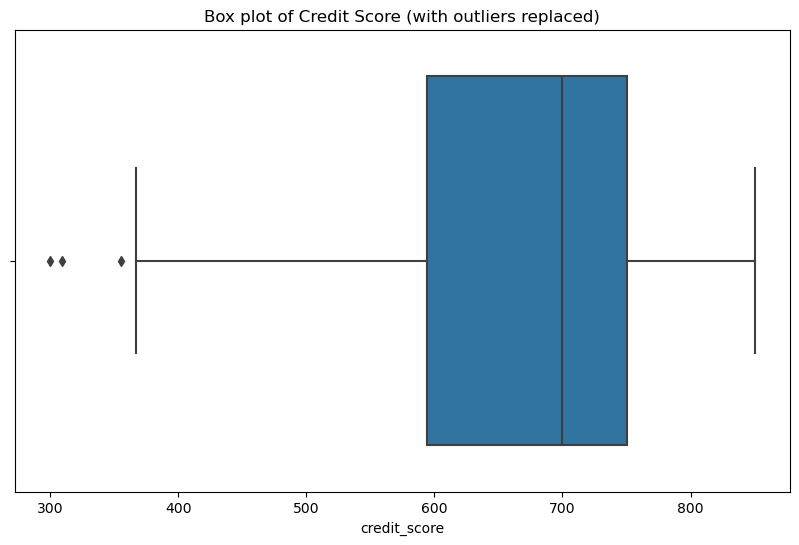

In [118]:

# Create a box plot to visualize the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Credit Score (with outliers replaced)')
plt.show()

In [119]:
df['credit_score'].describe()

count     79.000000
mean     662.316456
std      137.021198
min      300.000000
25%      594.500000
50%      700.000000
75%      750.000000
max      850.000000
Name: credit_score, dtype: float64

In [128]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000         760.0    Male   
1     49         480000   Salaried           30000         750.0    Male   
2     37         480000   Salaried           10000         710.0    Male   
3     21         240000   Salaried            5000         700.0    Male   
4     42          35000  Housewife           12500         800.0  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000         750.0    Male   
97    55         600000      Other          100000         789.0    Male   
98    28         120000  Housewife           20000         786.0  Female   
99    54         240000      Other            5000         768.0  Female   
100   22              0      Other           30000         500.0    Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[79 rows x 15 columns]

# Annual Income	

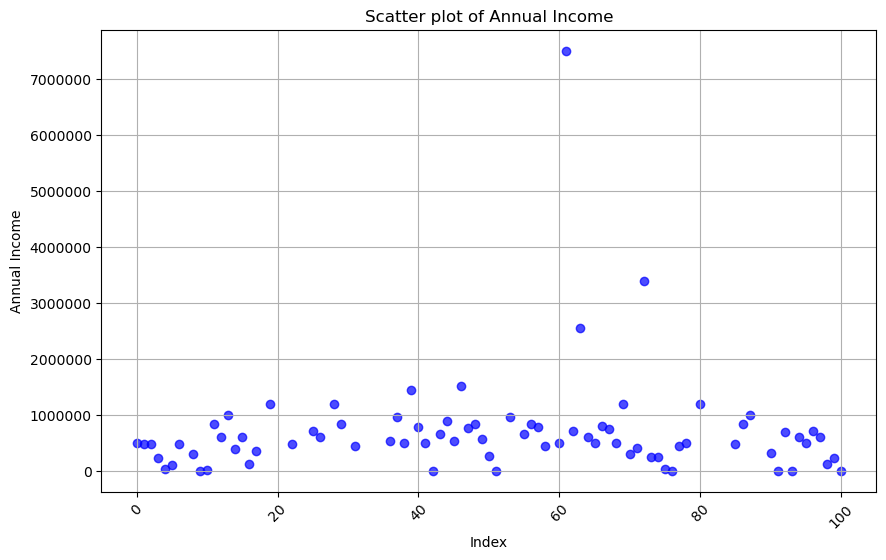

In [130]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Annual Income'], color='blue', alpha=0.7)
plt.title('Scatter plot of Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 [Text(-1000000.0, 0, '−1000000'),
  Text(0.0, 0, '0'),
  Text(1000000.0, 0, '1000000'),
  Text(2000000.0, 0, '2000000'),
  Text(3000000.0, 0, '3000000'),
  Text(4000000.0, 0, '4000000'),
  Text(5000000.0, 0, '5000000'),
  Text(6000000.0, 0, '6000000'),
  Text(7000000.0, 0, '7000000'),
  Text(8000000.0, 0, '8000000')])

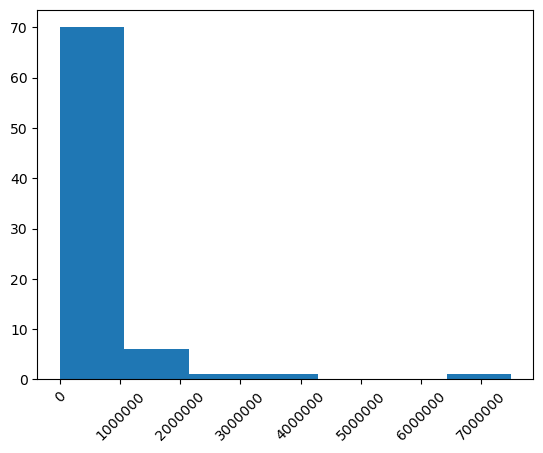

In [133]:
plt.hist(df['Annual Income'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


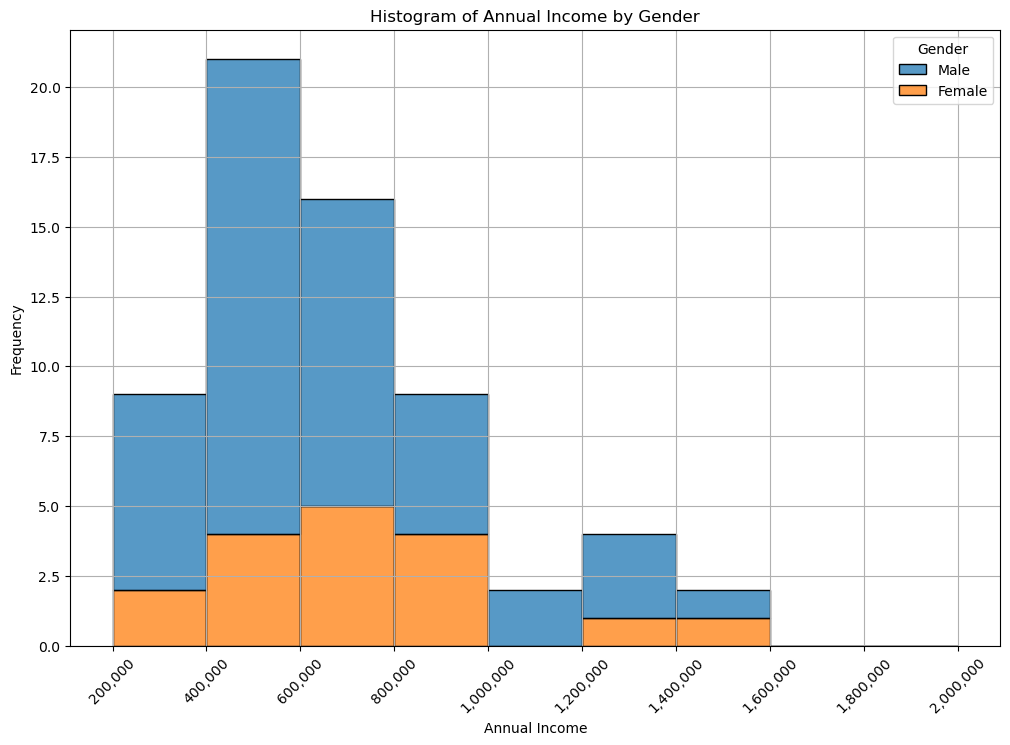

In [136]:

# Define bins for the histogram
bins = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='Annual Income', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


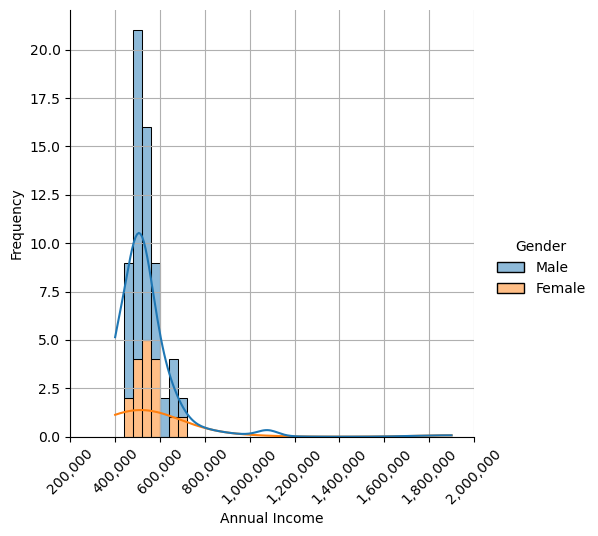

In [138]:

# Define bins for the histogram
bins = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000]

# Create the histogram with hue using displot
g = sns.displot(df, x='Annual Income', hue='Gender', bins=bins, kind='hist', multiple='stack', edgecolor='black',kde=True)

# Customize the x-axis labels
g.set_axis_labels('Annual Income', 'Frequency')
g.set_titles('Histogram of Annual Income by Gender')
g.set_xticklabels([f'{x:,}' for x in bins], rotation=45)

# Show the plot
plt.grid(True)
plt.show()

# AccountBalance

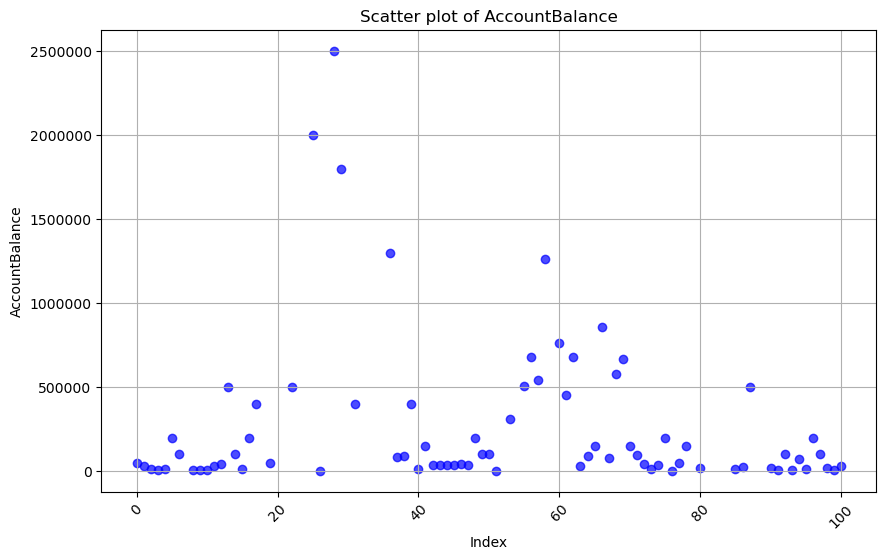

In [139]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['AccountBalance'], color='blue', alpha=0.7)
plt.title('Scatter plot of AccountBalance')
plt.xlabel('Index')
plt.ylabel('AccountBalance')
plt.grid(True)
plt.show()

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 [Text(-500000.0, 0, '−500000'),
  Text(0.0, 0, '0'),
  Text(500000.0, 0, '500000'),
  Text(1000000.0, 0, '1000000'),
  Text(1500000.0, 0, '1500000'),
  Text(2000000.0, 0, '2000000'),
  Text(2500000.0, 0, '2500000'),
  Text(3000000.0, 0, '3000000')])

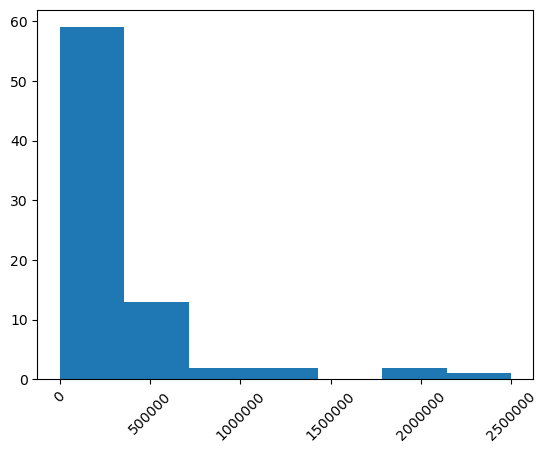

In [140]:
plt.hist(df['AccountBalance'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


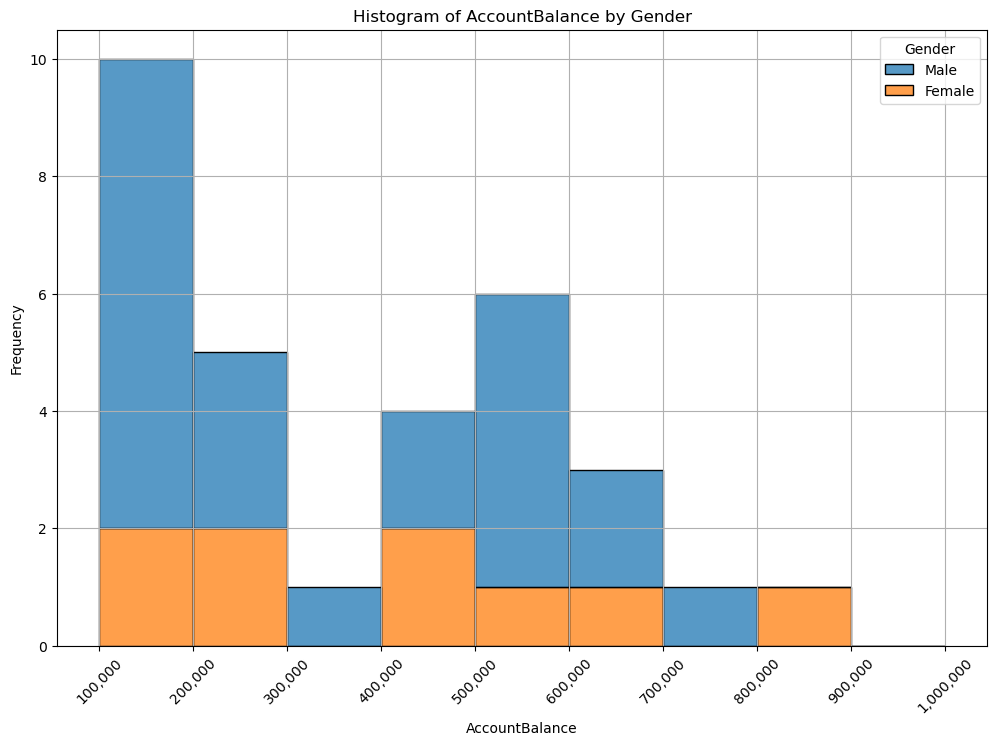

In [142]:

# Define bins for the histogram
bins = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='AccountBalance', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of AccountBalance by Gender')
plt.xlabel('AccountBalance')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

# Networth

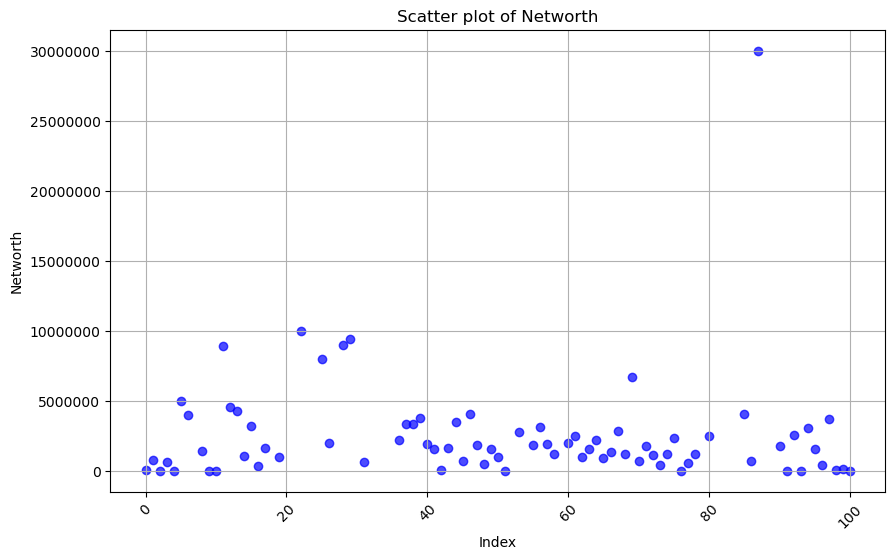

In [143]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)
plt.show()

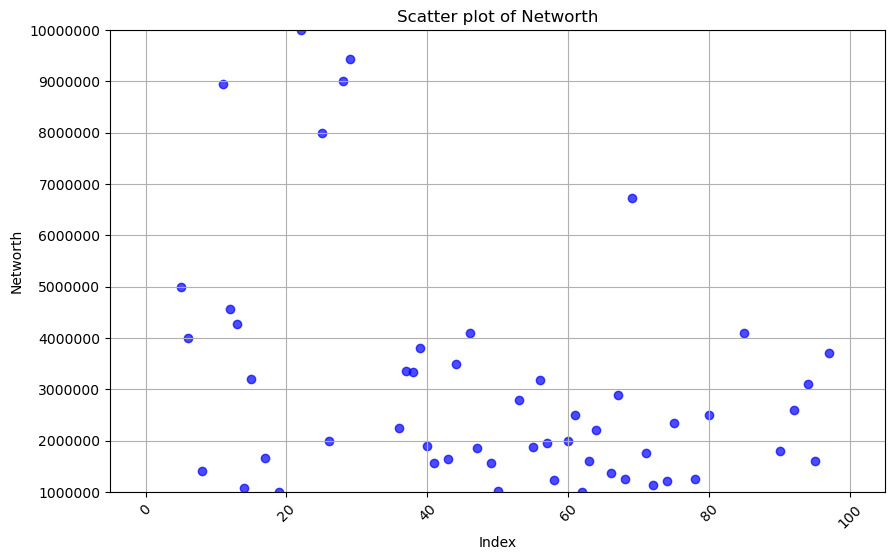

In [144]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)

plt.ylim(1000000, 10000000)
plt.yticks(range(1000000, 10000001, 1000000))

plt.show()

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000.]),
 [Text(-5000000.0, 0, '−5000000'),
  Text(0.0, 0, '0'),
  Text(5000000.0, 0, '5000000'),
  Text(10000000.0, 0, '10000000'),
  Text(15000000.0, 0, '15000000'),
  Text(20000000.0, 0, '20000000'),
  Text(25000000.0, 0, '25000000'),
  Text(30000000.0, 0, '30000000'),
  Text(35000000.0, 0, '35000000')])

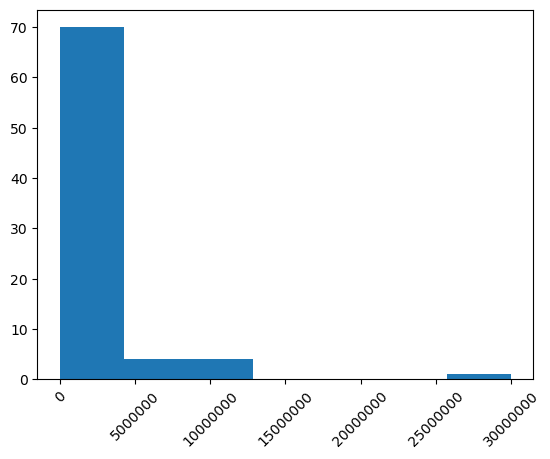

In [145]:
plt.hist(df['Networth'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

# Bivariate Analysis

In [87]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[97 rows x 15 columns]

# Age vs Annual Income

<Axes: xlabel='Annual Income', ylabel='Age'>

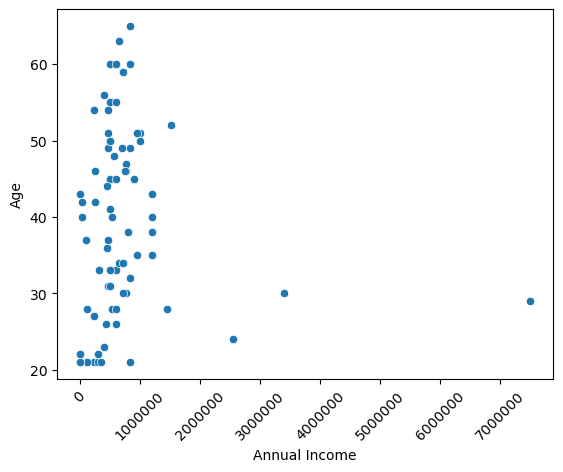

In [122]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Annual Income', ylabel='Age'>

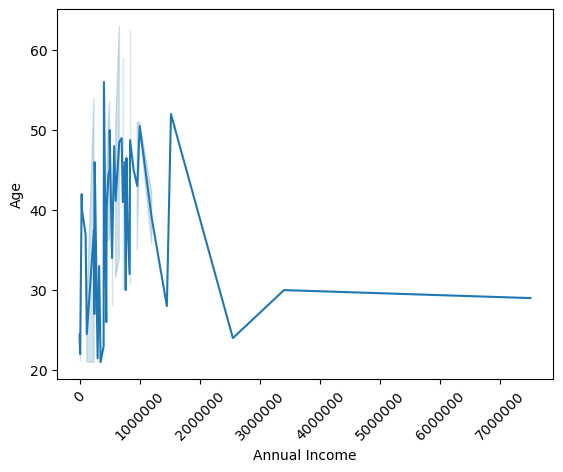

In [121]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Annual Income',y='Age',data=df)

<Axes: xlabel='Annual Income', ylabel='Age'>

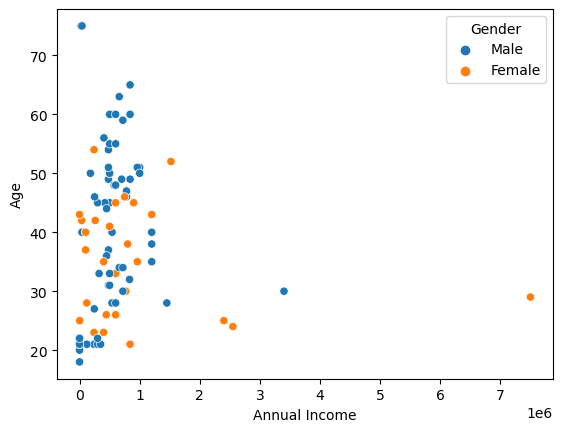

In [90]:
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])

<Axes: xlabel='Annual Income', ylabel='Age'>

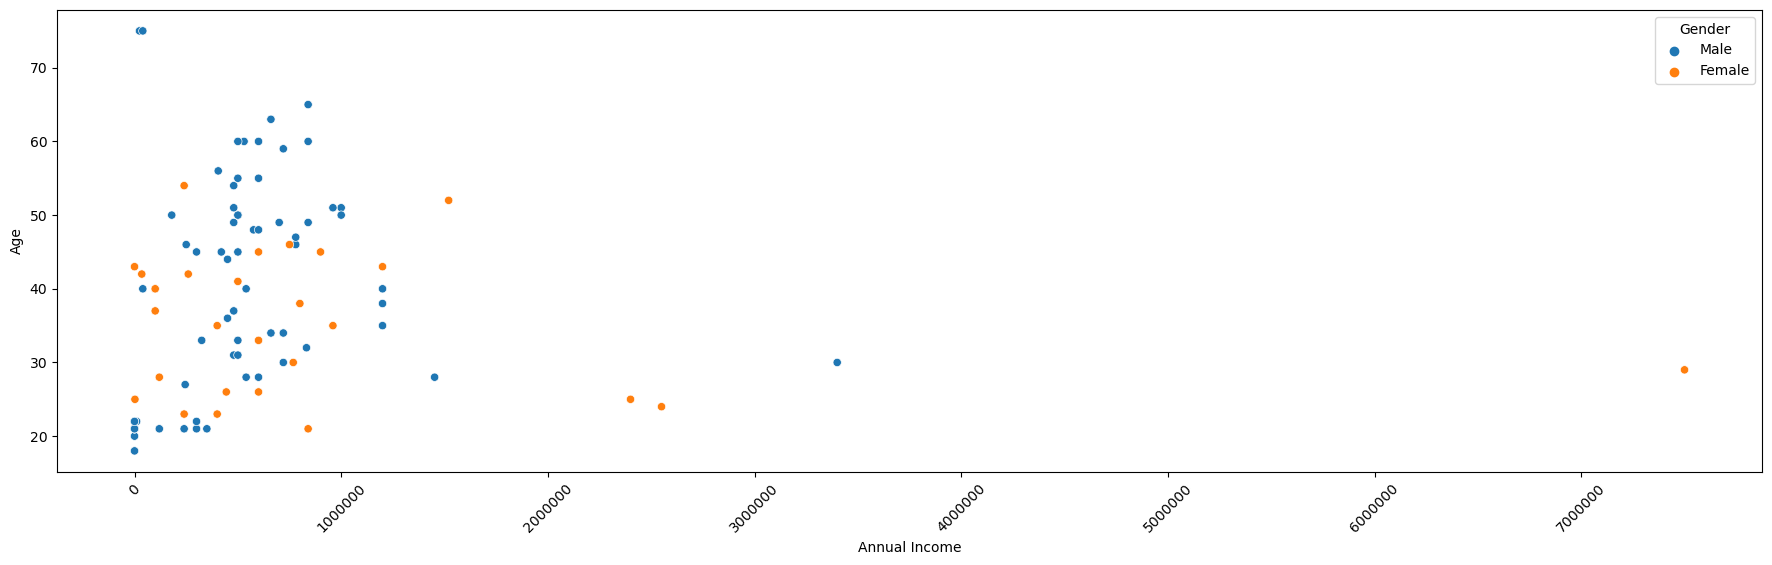

In [91]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])

<Axes: xlabel='AccountBalance', ylabel='Age'>

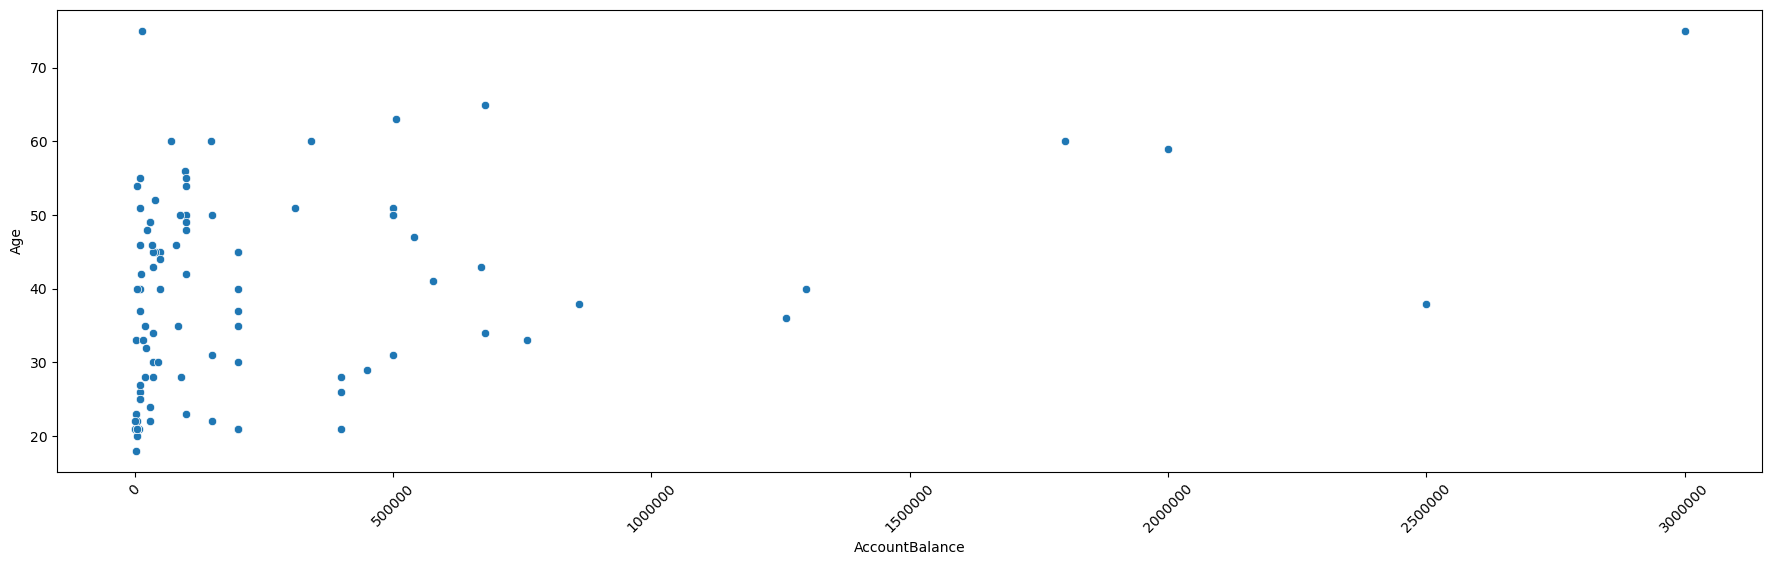

In [92]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Age',data=df)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AccountBalance', ylabel='Age'>

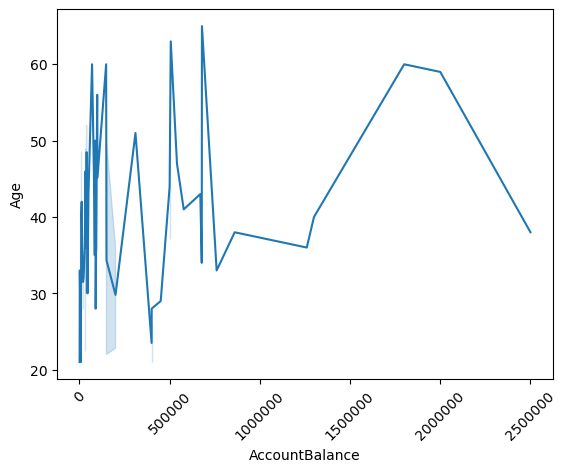

In [123]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

sns.lineplot(x='AccountBalance',y='Age',data=df)

In [94]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000           760    Male   
1     49         480000   Salaried           30000           750    Male   
2     37         480000   Salaried           10000           710    Male   
3     21         240000   Salaried            5000           700    Male   
4     42          35000  Housewife           12500           800  Female   
..   ...            ...        ...             ...           ...     ...   
96    30         720000   Salaried          200000           750    Male   
97    55         600000      Other          100000           789    Male   
98    28         120000  Housewife           20000           786  Female   
99    54         240000      Other            5000           768  Female   
100   22              0      Other           30000           500    Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[97 rows x 15 columns]

# Annual Income	 vs credit_score

(0.0, 1100.0)

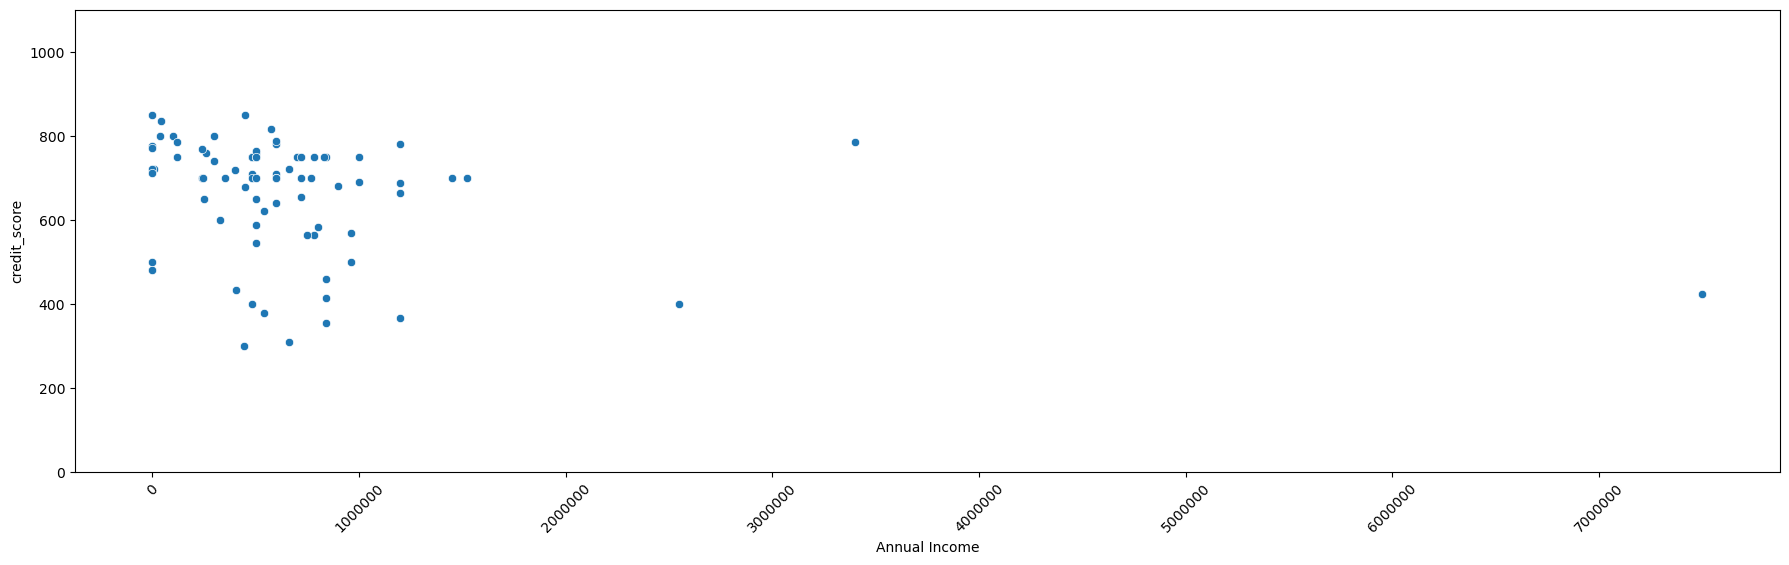

In [124]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(0, 1100)

(250.0, 900.0)

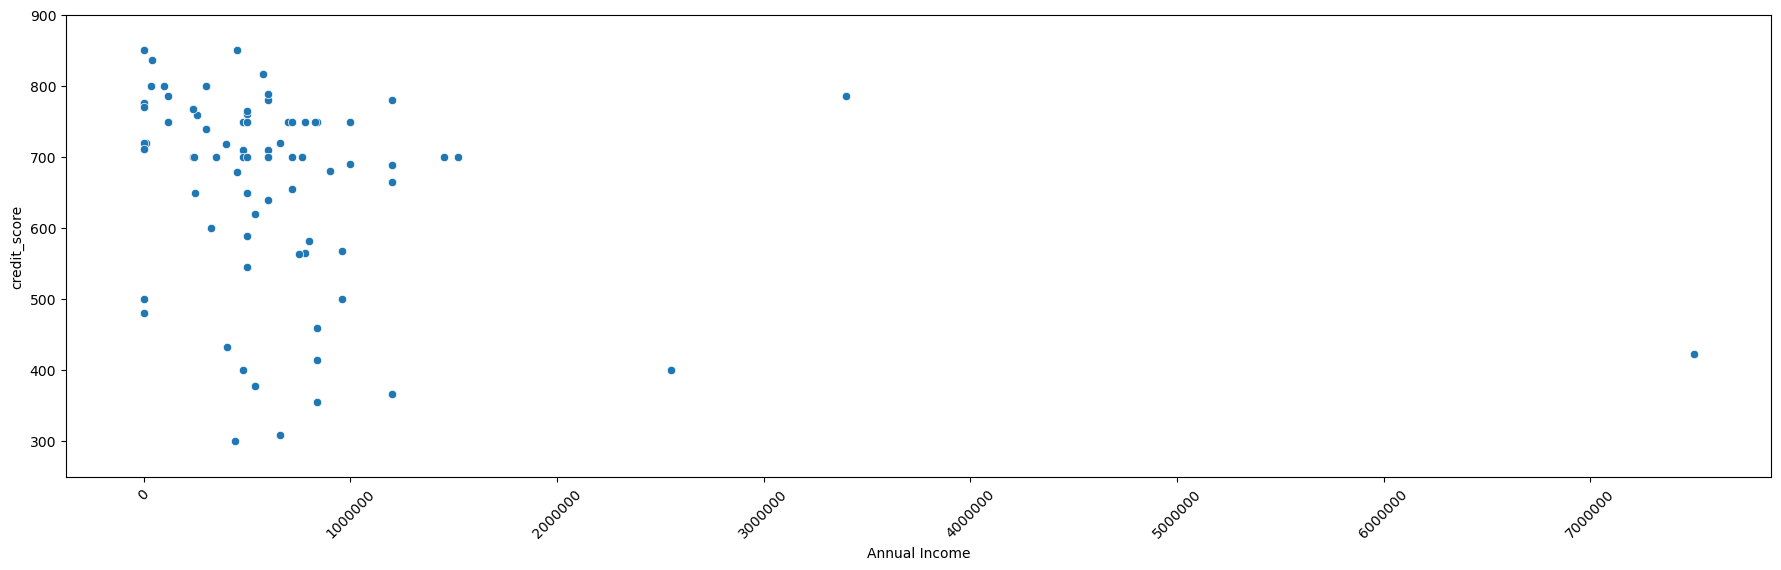

In [125]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(250, 900)

In [126]:
df['credit_score'].describe()

count     79.000000
mean     662.316456
std      137.021198
min      300.000000
25%      594.500000
50%      700.000000
75%      750.000000
max      850.000000
Name: credit_score, dtype: float64

# credit_score vs LastMonthTrans

(0.0, 1100.0)

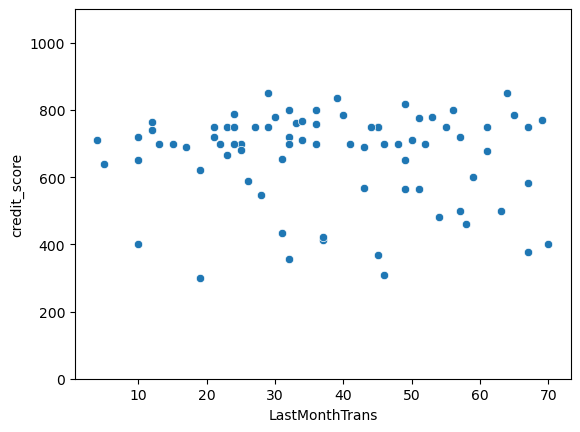

In [127]:
sns.scatterplot(x='LastMonthTrans',y='credit_score',data=df)
# Set the maximum value for both axes to 1000
#plt.xlim(0, 1000)
plt.ylim(0, 1100)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 1200.0)

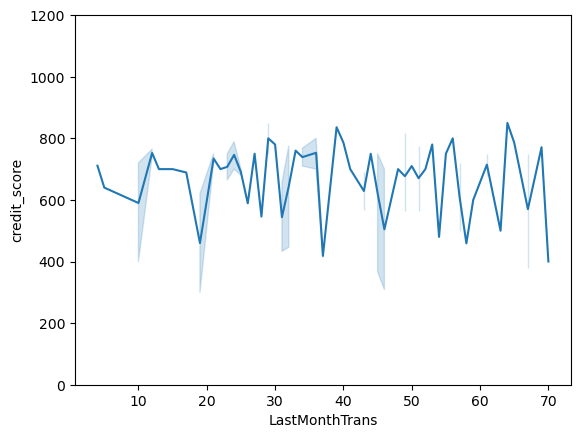

In [149]:
sns.lineplot(x='LastMonthTrans',y='credit_score',data=df)
plt.ylim(0,1200)

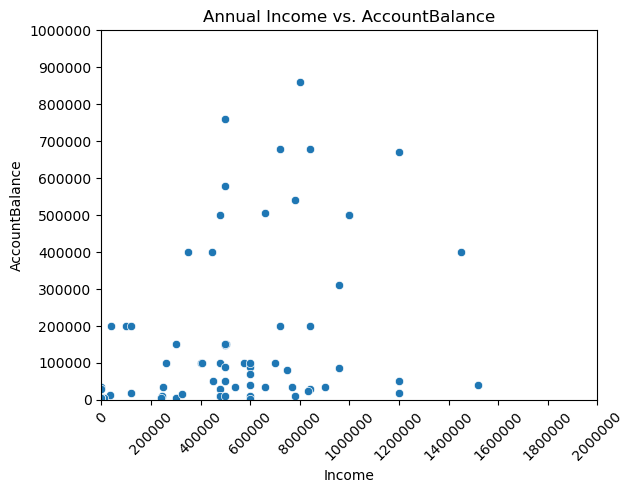

In [147]:
sns.scatterplot(x='Annual Income', y='AccountBalance', data=df)

# Set the axis ranges
plt.xlim(200000, 2000000)
plt.ylim(100000, 1000000)

# Set tick marks for better readability
plt.xticks(range(0, 2000001, 200000))
plt.yticks(range(0, 1000001, 100000))




plt.ticklabel_format(style='plain')
plt.xticks(rotation=45) 
plt.title('Annual Income vs. AccountBalance')
plt.xlabel('Income')
plt.ylabel('AccountBalance')
plt.show()

In [118]:
df

Age  Annual Income Occupation  AccountBalance  credit_score   Gender  \
0     45         500100   Salaried           50000           760     Male   
1     49         480000   Salaried           30000           750     Male   
2     37         480000   Salaried           10000           710     Male   
3     21         240000   Salaried            5000           700     Male   
4     42          35000  Housewife           12500           800  Female    
..   ...            ...        ...             ...           ...      ...   
96    30         720000   Salaried          200000           750     Male   
97    55         600000      Other          100000           789     Male   
98    28         120000  Housewife           20000           786   Female   
99    54         240000      Other            5000           768   Female   
100   22              0      Other           30000           500     Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2     UnderGraduate             0              2           Yes       6   
3     UnderGraduate             1              2            No       2   
4         Graduate              1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[101 rows x 15 columns]

<Axes: xlabel='AccountBalance', ylabel='Networth'>

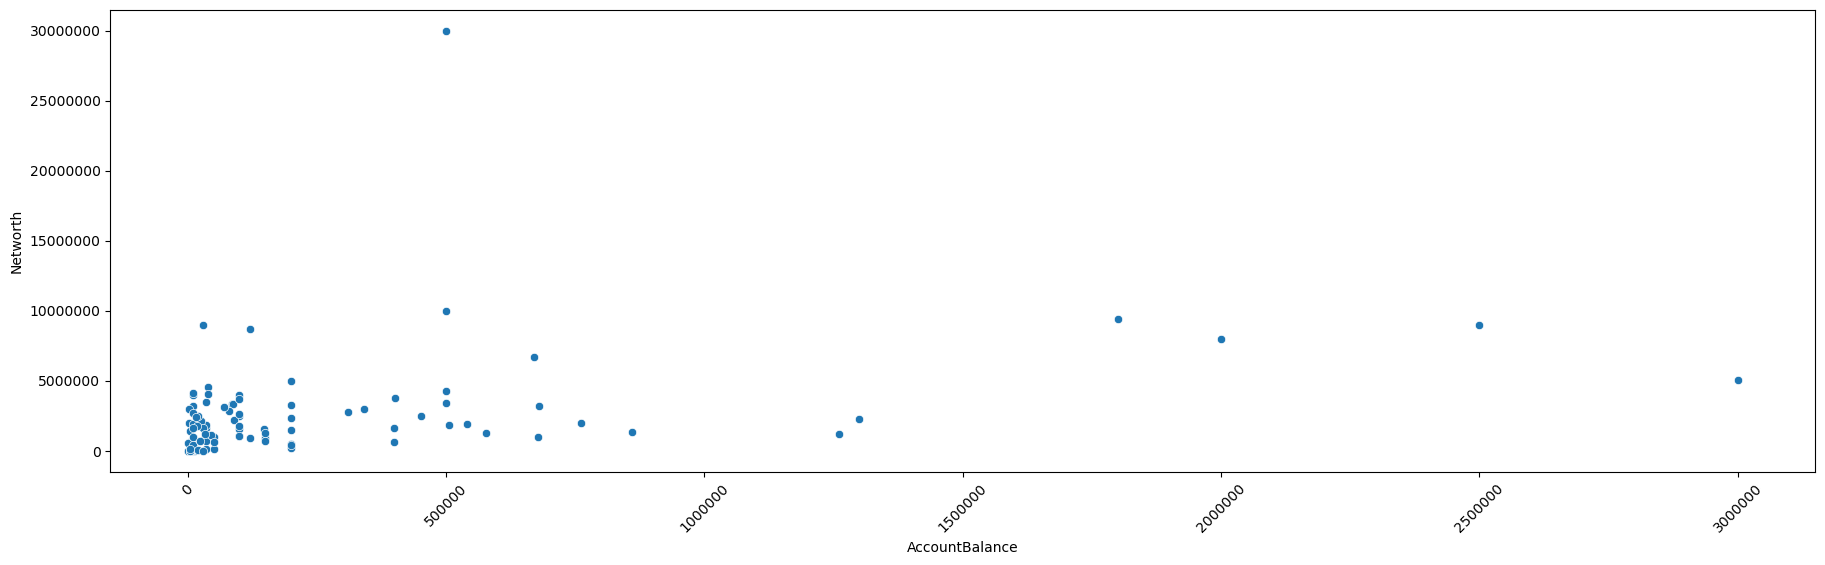

In [119]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Networth',data=df)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AccountBalance', ylabel='Networth'>

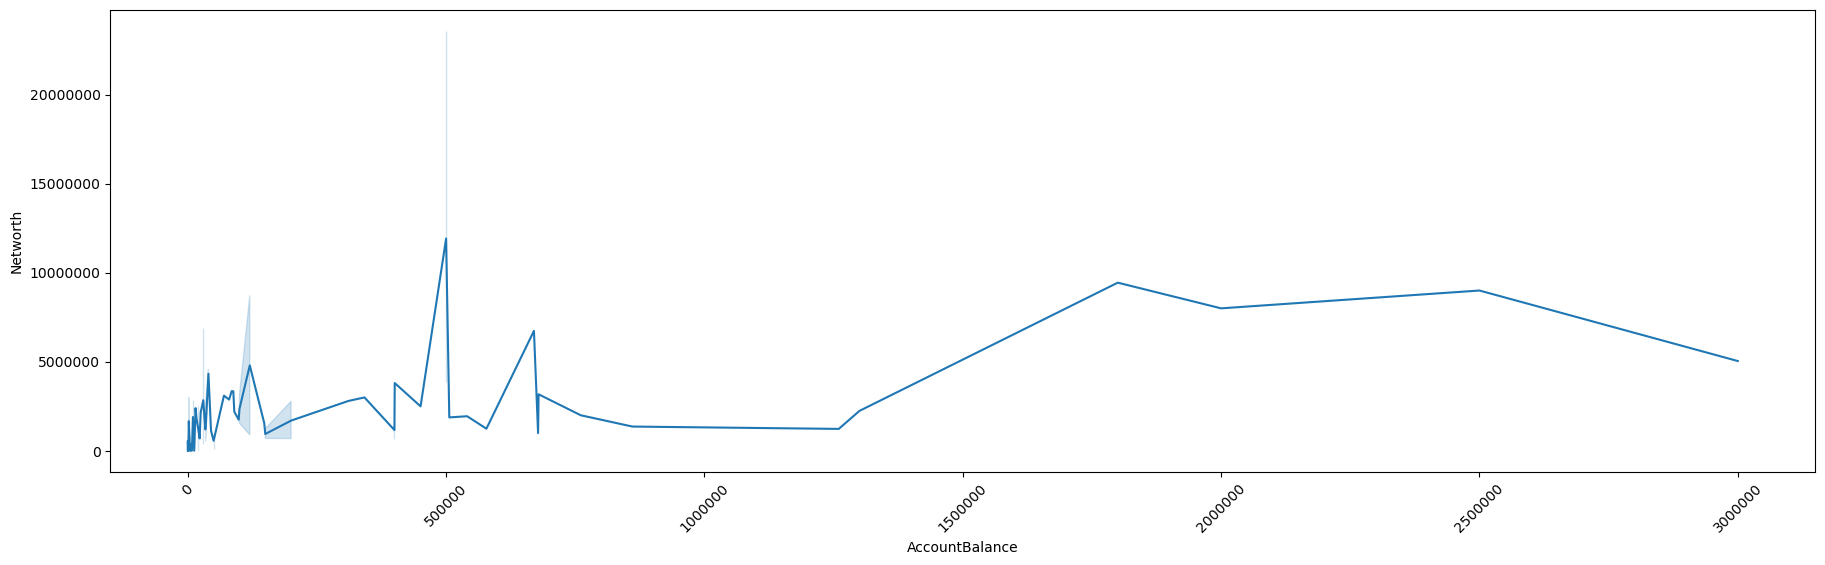

In [120]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='AccountBalance',y='Networth',data=df)

<Axes: xlabel='Age', ylabel='Networth'>

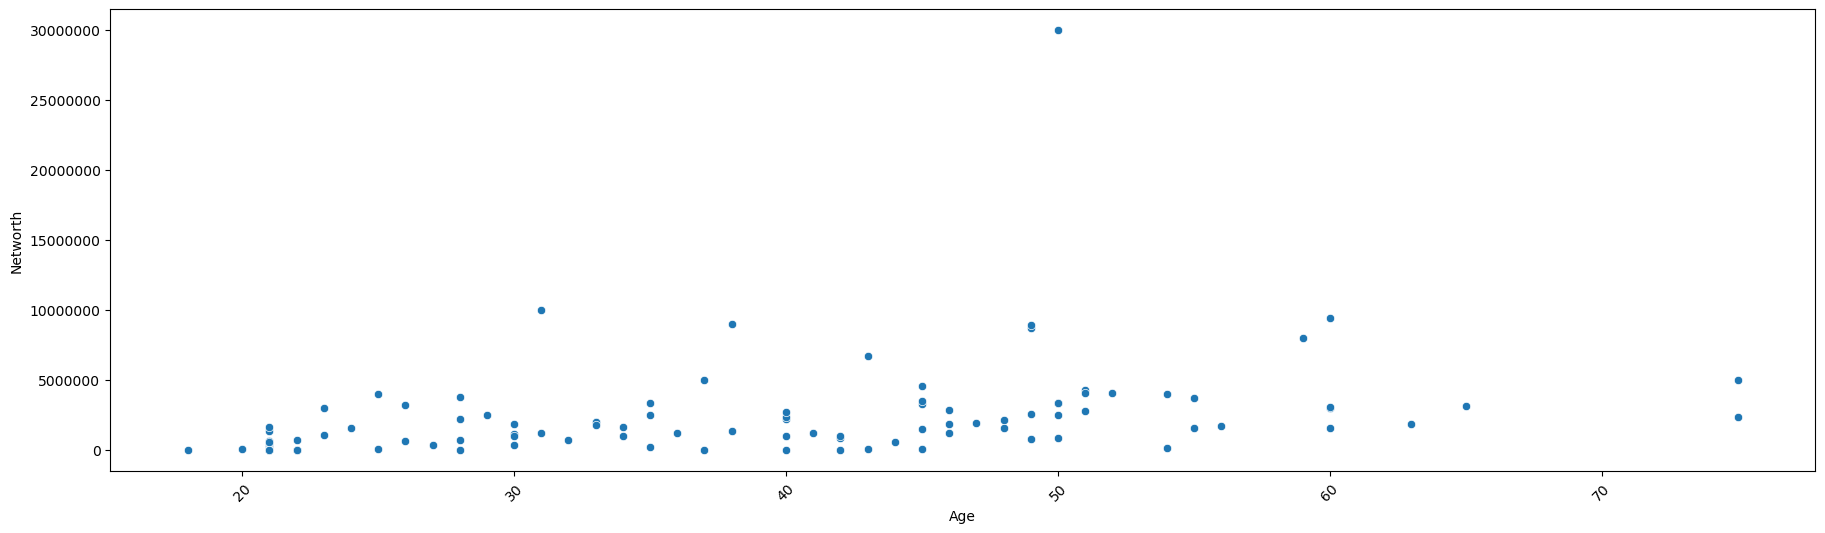

In [121]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Age',y='Networth',data=df)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Networth'>

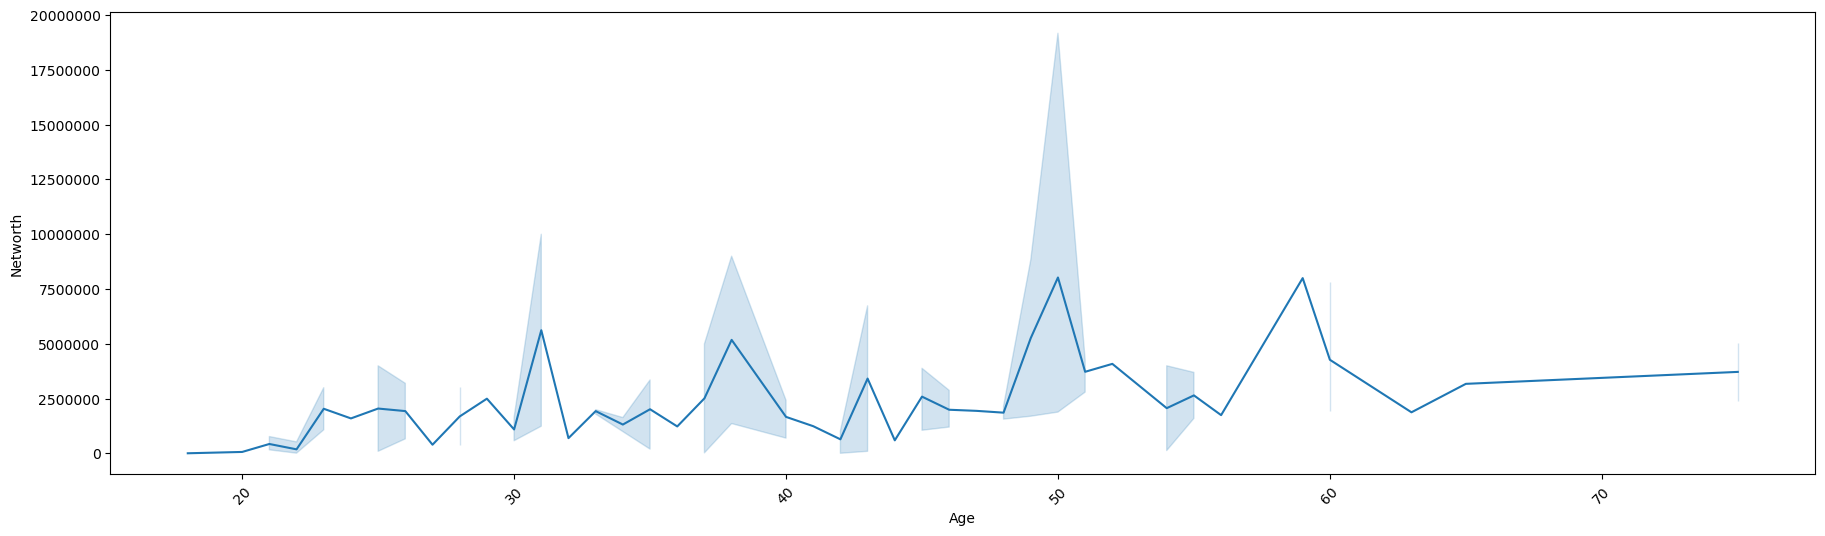

In [122]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Age',y='Networth',data=df)

# Married vs Networth

In [128]:
df['Married'].value_counts()

Married
yes    77
no     24
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='Networth'>

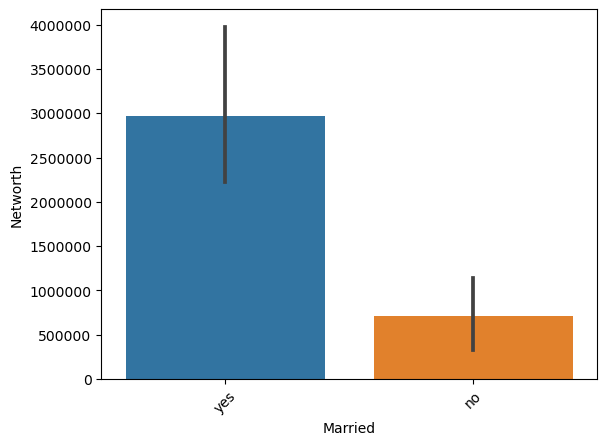

In [127]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Married',y='Networth',data=df)

# Gender vs Networth

<Axes: xlabel='Gender', ylabel='Networth'>

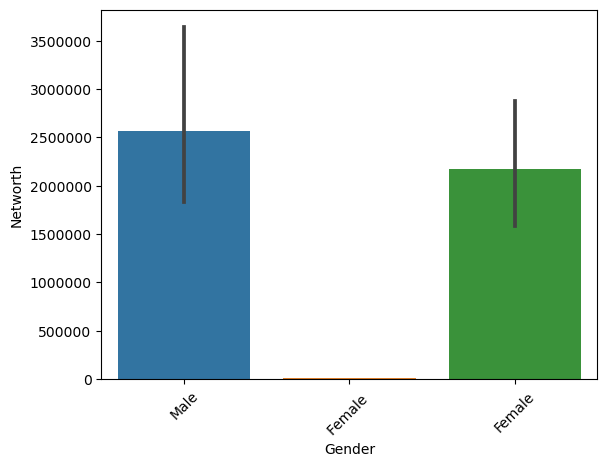

In [130]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Gender',y='Networth',data=df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\1244760426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\1244760426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

<Axes: xlabel='Networth', ylabel='Density'>

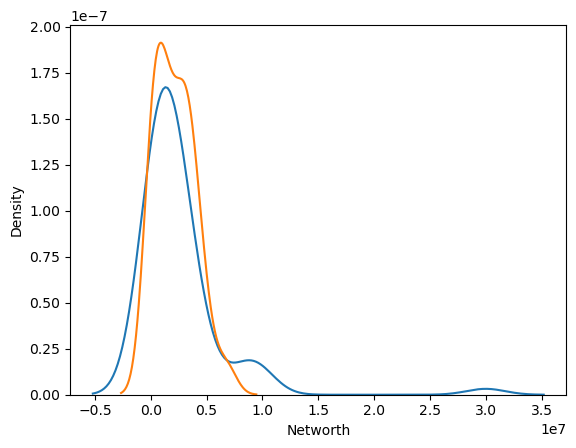

In [135]:
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

In [136]:
df

Age  Annual Income Occupation  AccountBalance  credit_score   Gender  \
0     45         500100   Salaried           50000           760     Male   
1     49         480000   Salaried           30000           750     Male   
2     37         480000   Salaried           10000           710     Male   
3     21         240000   Salaried            5000           700     Male   
4     42          35000  Housewife           12500           800  Female    
..   ...            ...        ...             ...           ...      ...   
96    30         720000   Salaried          200000           750     Male   
97    55         600000      Other          100000           789     Male   
98    28         120000  Housewife           20000           786   Female   
99    54         240000      Other            5000           768   Female   
100   22              0      Other           30000           500     Male   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2     UnderGraduate             0              2           Yes       6   
3     UnderGraduate             1              2            No       2   
4         Graduate              1              2           Yes       8   
..              ...           ...            ...           ...     ...   
96    Post Graduate             1              6           Yes      14   
97   Under Graduate             2              3            No      19   
98   Under Graduate             0              1            No       6   
99   Under Graduate             1              2            No      17   
100  Under Graduate             0              1            No       1   

     LastMonthTrans  Networth Married  Dependents  
0                33    100000     yes           2  
1                23    800087     yes           3  
2                34     30000     yes           4  
3                25    650000      no           0  
4                56     10000     yes           3  
..              ...       ...     ...         ...  
96               61    400000     yes           2  
97               24   3700000     yes           3  
98               65     50599     yes           1  
99               34    134000     yes           3  
100              63     21750      no           0  

[101 rows x 15 columns]

# Active_loans vs Networth

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\3145418287.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\3145418287.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

<Axes: xlabel='Networth', ylabel='Density'>

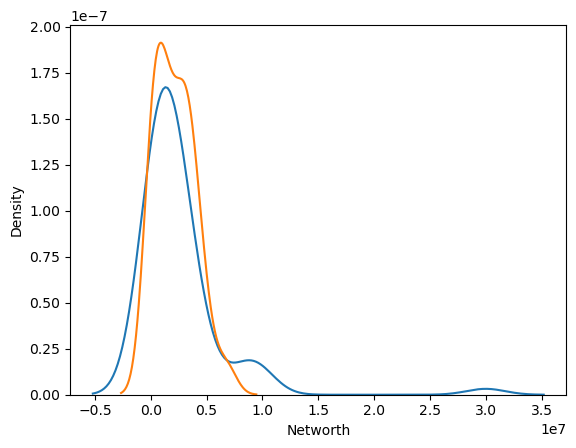

In [142]:
#plt.figure(figsize=(22, 6))
#plt.ticklabel_format(style='plain')
#plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\3601542953.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21064\3601542953.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ad

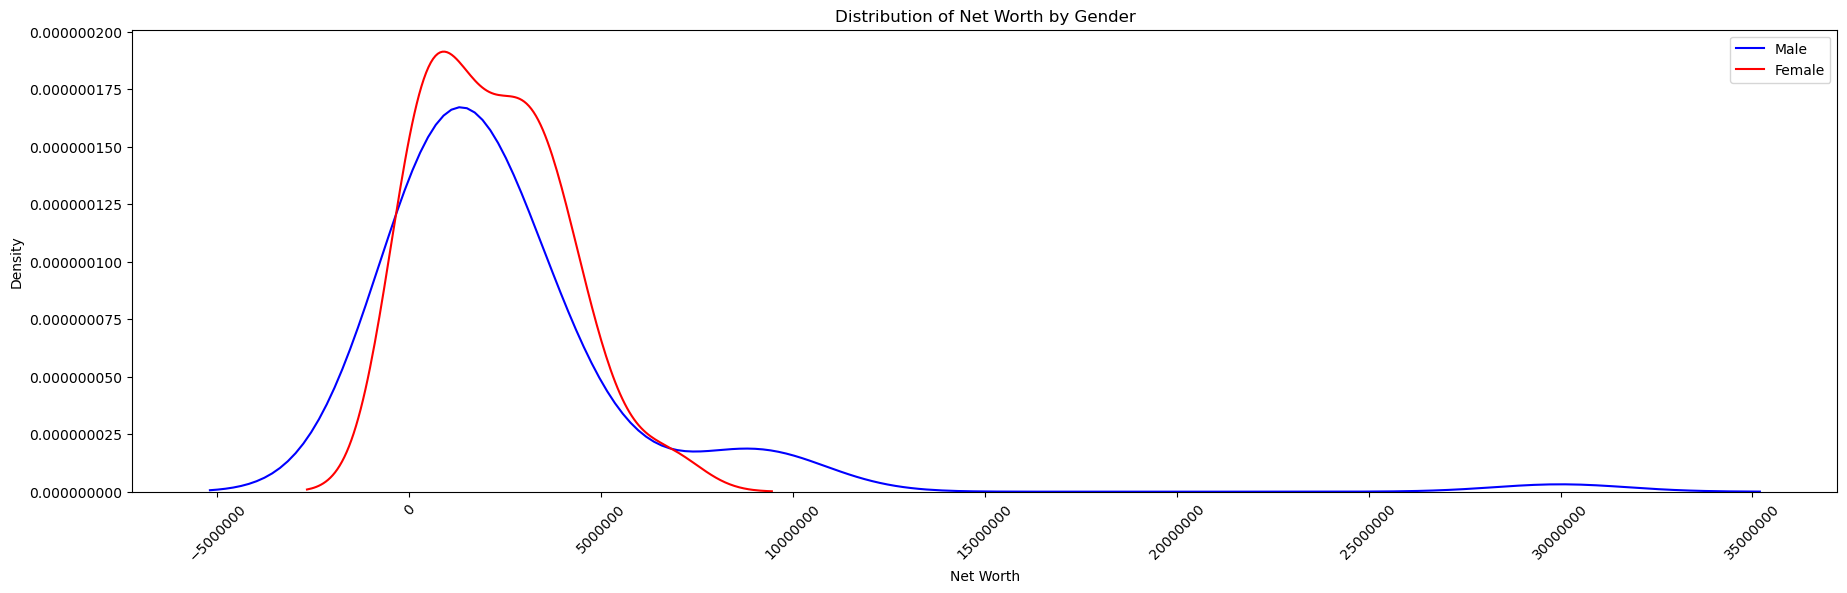

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(22, 6))

# Remove scientific notation for tick labels
plt.ticklabel_format(style='plain')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create distribution plots with specified colors
sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
sns.distplot(df[df['Gender']=='Female']['Networth'], hist=False, color='red', label='Female')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Net Worth')
plt.ylabel('Density')
plt.title('Distribution of Net Worth by Gender')

# Display the plot
plt.show()


<Axes: xlabel='Active_loans', ylabel='Networth'>

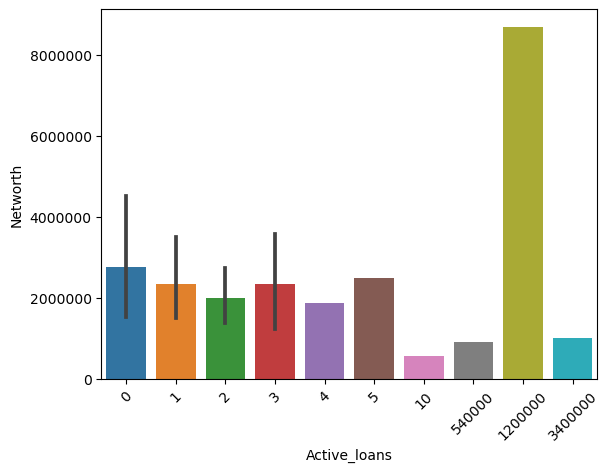

In [144]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='Networth',data=df)

# Active Loans vs Credit score

<Axes: xlabel='Active_loans', ylabel='credit_score'>

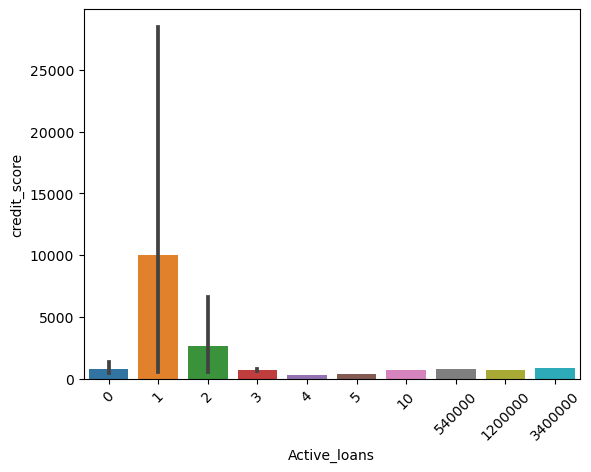

In [145]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='credit_score',data=df)

# Active Loans vs LastMonthTrans

<Axes: xlabel='Active_loans', ylabel='LastMonthTrans'>

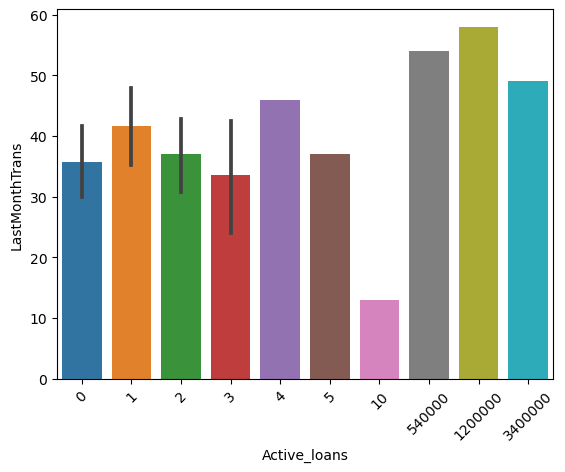

In [146]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='LastMonthTrans',data=df)

# Bank Products vs Annual Income

In [147]:
df['Bank_Products'].value_counts()

Bank_Products
1    36
3    28
2    23
4     9
5     4
6     1
Name: count, dtype: int64

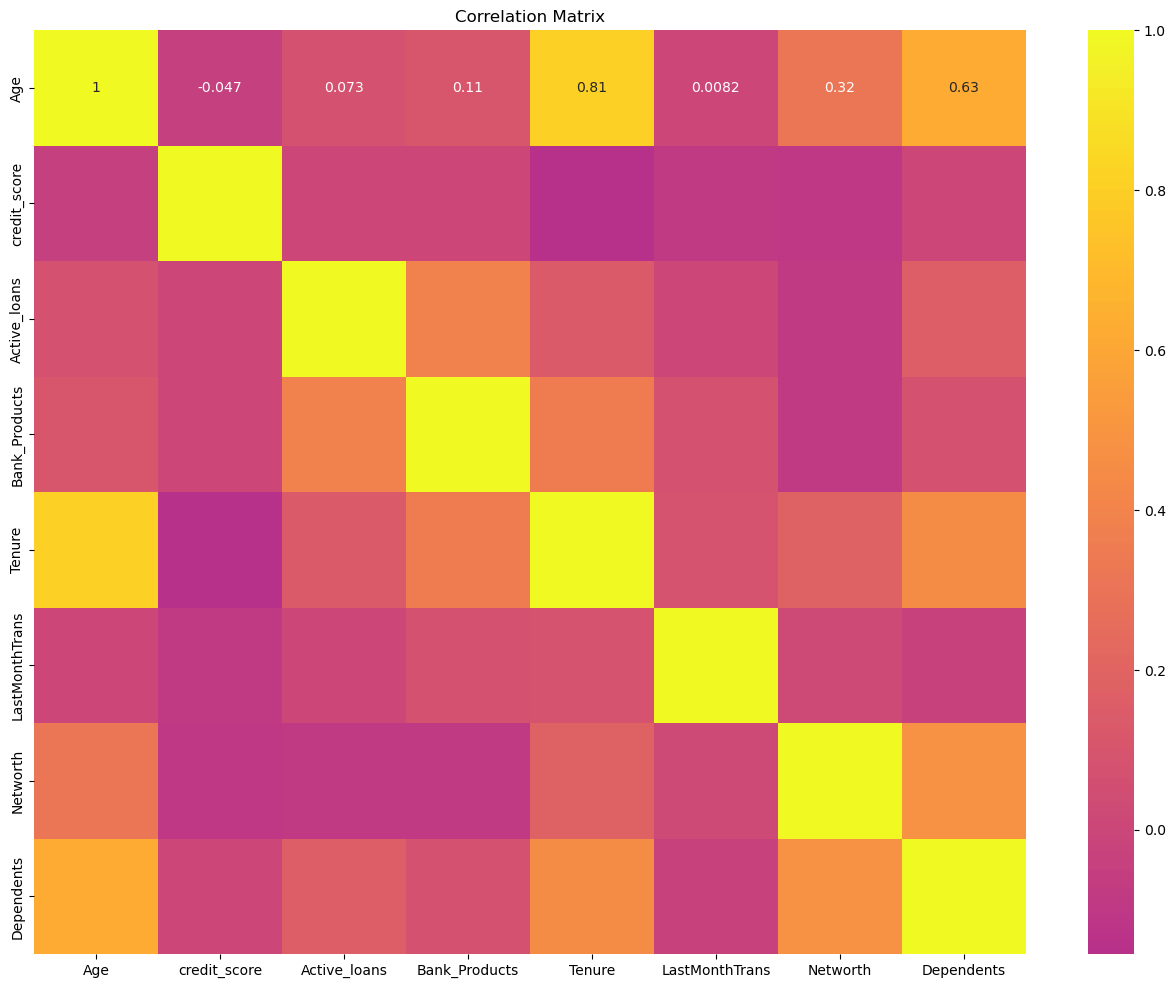

In [150]:
df1 = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = df1.corr()
plt.figure(figsize=(16, 12))
# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()

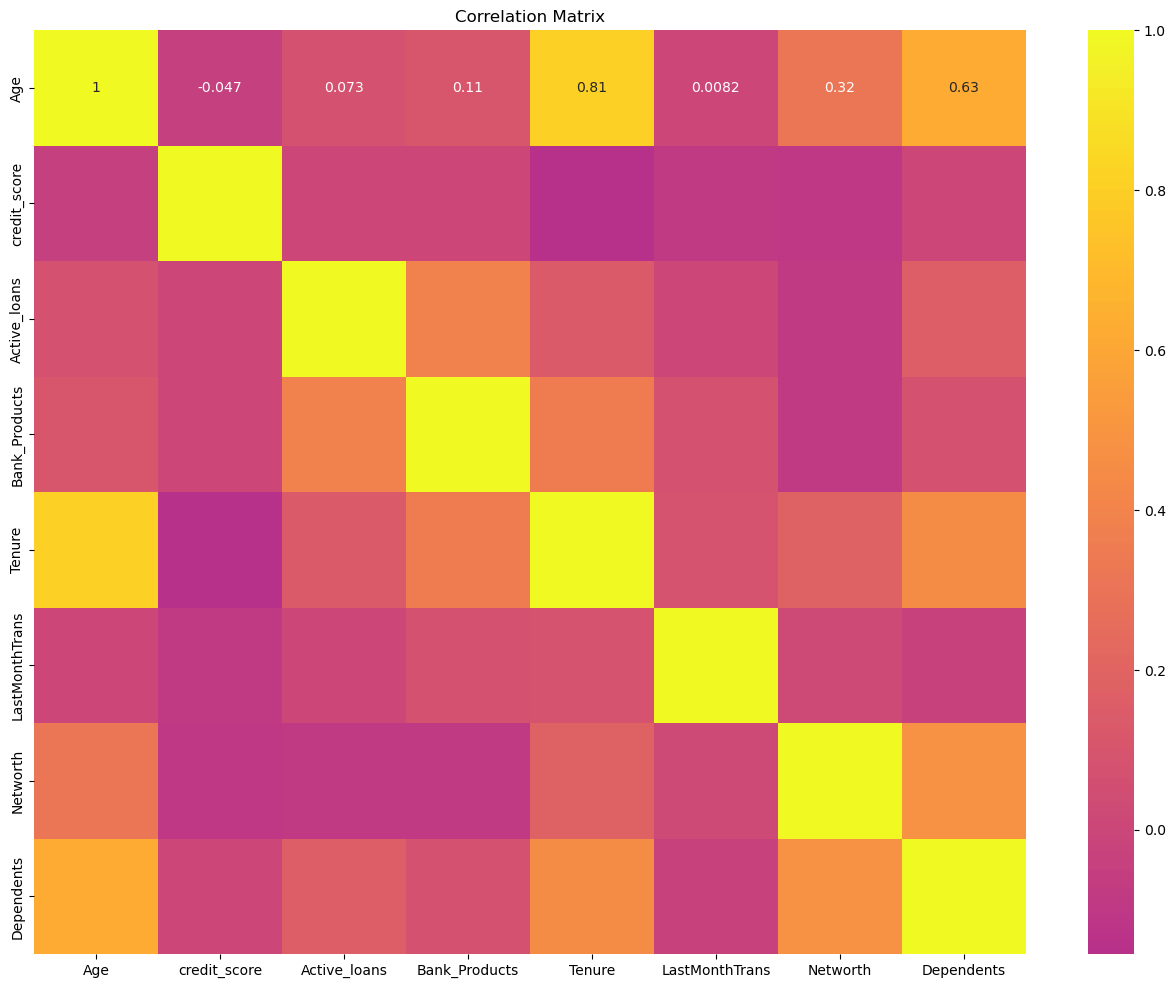

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df1 = df.select_dtypes(include=['int64', 'float64'])

# Optionally handle missing values, e.g., fill with the mean or drop rows/columns with missing values
df1 = df1.fillna(df1.mean())  # or df1.dropna() if you prefer to drop rows/columns with missing values

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()


Age                 int64
credit_score      float64
Active_loans        int64
Bank_Products       int64
Tenure              int64
LastMonthTrans      int64
Networth            int64
Dependents          int64
dtype: object
             Age  credit_score  Active_loans  Bank_Products     Tenure  \
count  79.000000     79.000000     79.000000      79.000000  79.000000   
mean   38.443038    662.316456      1.215190       2.430380   9.962025   
std    12.504099    137.021198      1.205446       1.194899   6.530879   
min    21.000000    300.000000      0.000000       1.000000   1.000000   
25%    28.000000    594.500000      0.000000       1.000000   4.500000   
50%    38.000000    700.000000      1.000000       2.000000   9.000000   
75%    49.000000    750.000000      2.000000       3.000000  14.000000   
max    65.000000    850.000000      5.000000       6.000000  30.000000   

       LastMonthTrans      Networth  Dependents  
count       79.000000  7.900000e+01   79.000000  
mean       

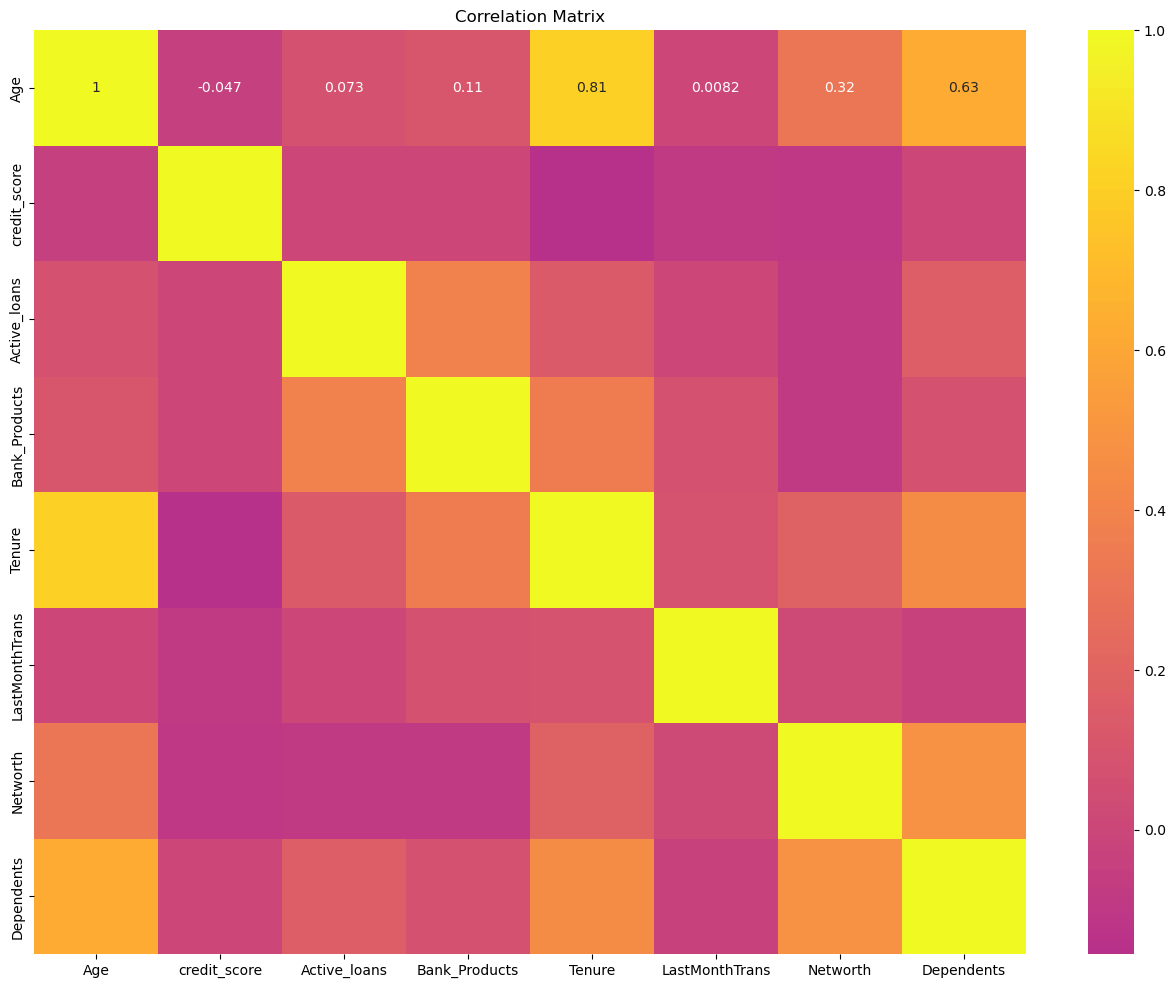

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df1 = df.select_dtypes(include=['int64', 'float64'])

# Inspect the data types and summary statistics
print(df1.dtypes)
print(df1.describe())

# Optionally handle missing values
df1 = df1.fillna(df1.mean())

# Check for constant columns (if any)
print(df1.std())

# Calculate the correlation matrix
corr_matrix = df1.corr()
print(corr_matrix)

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()


<Axes: >

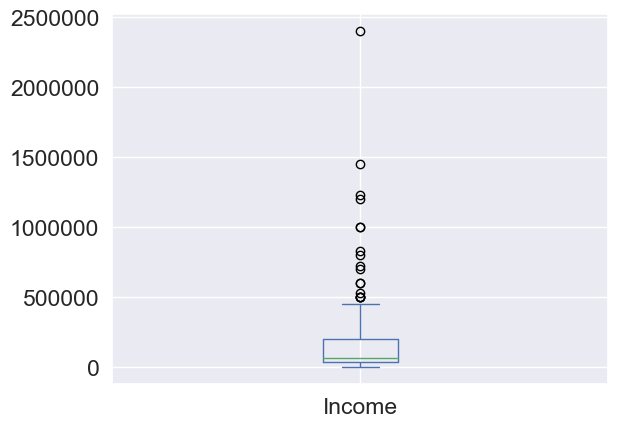

In [91]:

plt.ticklabel_format(style='plain')
df['Income'].plot(kind='box') 



<Axes: >

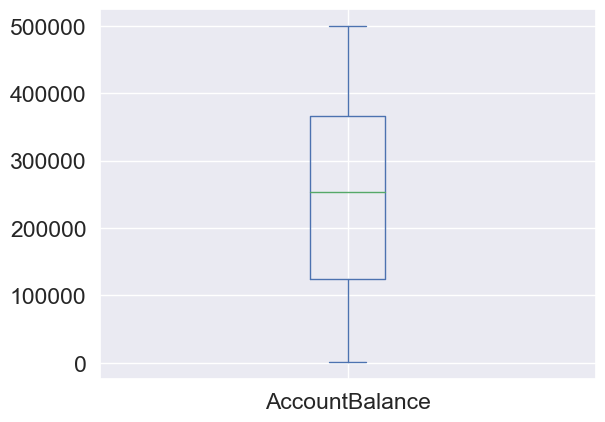

In [36]:

plt.ticklabel_format(style='plain')
df['AccountBalance'].plot(kind='box')

In [37]:
df['Trans'].max()

49

In [38]:
df['trans_freq']=df['Trans']/49

In [39]:
df['trans_freq']

0       0.979592
1       0.836735
2       0.163265
3       0.367347
4       0.714286
          ...   
1995    0.448980
1996    0.265306
1997    0.510204
1998    0.612245
1999    0.897959
Name: trans_freq, Length: 2000, dtype: float64

In [40]:
df

Customer_ID  Gender  Age   Income  Total_Loan  Credit_Score  Trans  \
0      CUST00001  Female   62   100791           4           721     48   
1      CUST00002  Female   65   992878           3           726     41   
2      CUST00003    Male   18   961530           3           432      8   
3      CUST00004  Female   21  1063618           1           627     18   
4      CUST00005  Female   21   715106           0           849     35   
...          ...     ...  ...      ...         ...           ...    ...   
1995   CUST01996    Male   30   774958           2           630     22   
1996   CUST01997    Male   63   444580           4           757     13   
1997   CUST01998    Male   25  1034581           4           318     25   
1998   CUST01999  Female   65   897036           2           654     30   
1999   CUST02000  Female   64   395729           0           511     44   

      AccountBalance  ProductHolding  Tenure  trans_freq  
0              54079               3      19    0.979592  
1             298733               3      14    0.836735  
2             160354               3       4    0.163265  
3             328736               2      19    0.367347  
4             118574               3       7    0.714286  
...              ...             ...     ...         ...  
1995           93325               3       7    0.448980  
1996          179214               1      19    0.265306  
1997          450162               3      16    0.510204  
1998          366090               3      11    0.612245  
1999          241980               4      13    0.897959  

[2000 rows x 11 columns]

In [41]:
df = df.drop('Customer_ID', axis=1)

In [42]:
df

Gender  Age   Income  Total_Loan  Credit_Score  Trans  AccountBalance  \
0     Female   62   100791           4           721     48           54079   
1     Female   65   992878           3           726     41          298733   
2       Male   18   961530           3           432      8          160354   
3     Female   21  1063618           1           627     18          328736   
4     Female   21   715106           0           849     35          118574   
...      ...  ...      ...         ...           ...    ...             ...   
1995    Male   30   774958           2           630     22           93325   
1996    Male   63   444580           4           757     13          179214   
1997    Male   25  1034581           4           318     25          450162   
1998  Female   65   897036           2           654     30          366090   
1999  Female   64   395729           0           511     44          241980   

      ProductHolding  Tenure  trans_freq  
0                  3      19    0.979592  
1                  3      14    0.836735  
2                  3       4    0.163265  
3                  2      19    0.367347  
4                  3       7    0.714286  
...              ...     ...         ...  
1995               3       7    0.448980  
1996               1      19    0.265306  
1997               3      16    0.510204  
1998               3      11    0.612245  
1999               4      13    0.897959  

[2000 rows x 10 columns]

In [39]:
df = df.drop('Trans', axis=1)

In [40]:
df

Gender  Age   Income  Total_Loan  Credit_Score  AccountBalance  \
0     Female   62   100791           4           721           54079   
1     Female   65   992878           3           726          298733   
2       Male   18   961530           3           432          160354   
3     Female   21  1063618           1           627          328736   
4     Female   21   715106           0           849          118574   
...      ...  ...      ...         ...           ...             ...   
1995    Male   30   774958           2           630           93325   
1996    Male   63   444580           4           757          179214   
1997    Male   25  1034581           4           318          450162   
1998  Female   65   897036           2           654          366090   
1999  Female   64   395729           0           511          241980   

      ProductHolding  Tenure  trans_freq  
0                  3      19    0.979592  
1                  3      14    0.836735  
2                  3       4    0.163265  
3                  2      19    0.367347  
4                  3       7    0.714286  
...              ...     ...         ...  
1995               3       7    0.448980  
1996               1      19    0.265306  
1997               3      16    0.510204  
1998               3      11    0.612245  
1999               4      13    0.897959  

[2000 rows x 9 columns]

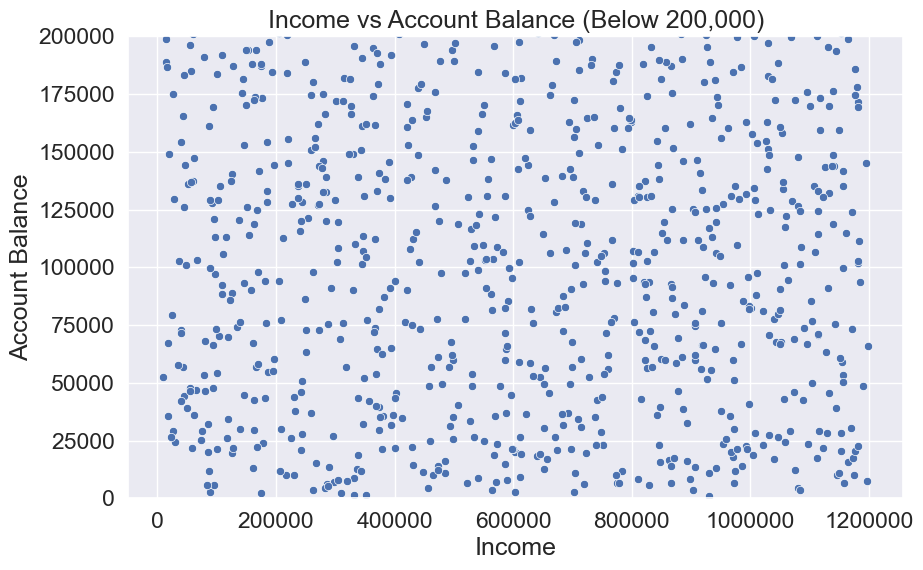

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='AccountBalance', data=df)

# Adjust the y-axis limits to focus on Account Balances below 200,000
plt.ylim(0, 200000)
plt.title('Income vs Account Balance (Below 200,000)')
plt.xlabel('Income')
plt.ylabel('Account Balance')
plt.ticklabel_format(style='plain')

plt.show()


In [42]:
df=pd.get_dummies(df, columns=['Gender'],drop_first=True)


In [43]:
df


Age   Income  Total_Loan  Credit_Score  AccountBalance  ProductHolding  \
0      62   100791           4           721           54079               3   
1      65   992878           3           726          298733               3   
2      18   961530           3           432          160354               3   
3      21  1063618           1           627          328736               2   
4      21   715106           0           849          118574               3   
...   ...      ...         ...           ...             ...             ...   
1995   30   774958           2           630           93325               3   
1996   63   444580           4           757          179214               1   
1997   25  1034581           4           318          450162               3   
1998   65   897036           2           654          366090               3   
1999   64   395729           0           511          241980               4   

      Tenure  trans_freq  Gender_Male  
0         19    0.979592        False  
1         14    0.836735        False  
2          4    0.163265         True  
3         19    0.367347        False  
4          7    0.714286        False  
...      ...         ...          ...  
1995       7    0.448980         True  
1996      19    0.265306         True  
1997      16    0.510204         True  
1998      11    0.612245        False  
1999      13    0.897959        False  

[2000 rows x 9 columns]

In [44]:
df['Gender_Male']=df['Gender_Male'].astype(int)

In [45]:
income_ranges = {
    'Low': (0, 500000),  # Low income in INR
    'Middle': (500000, 1000000),  # Middle income in INR
    'High': (1000000, 1500000),  # High income in INR
    'Very High': (1500000, np.inf)  # Very high income in INR
}

In [46]:
balance_ranges = {
    'Low': (0, 250000),  # Low balance in INR
    'Middle': (250000, 500000),  # Middle balance in INR
    'High': (500000, 750000),  # High balance in INR
    'Very High': (750000, np.inf)  # Very high balance in INR
}

In [47]:
df['IncomeCategory'] = pd.cut(
    df['Income'], 
    bins=[range[0] for range in income_ranges.values()] + [np.inf], 
    labels=income_ranges.keys(), 
    include_lowest=True
)

In [48]:
df['BalanceCategory'] = pd.cut(
    df['AccountBalance'], 
    bins=[range[0] for range in balance_ranges.values()] + [np.inf], 
    labels=balance_ranges.keys(), 
    include_lowest=True
)

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
encoder = OrdinalEncoder()

In [51]:
encoder.fit(df[['IncomeCategory', 'BalanceCategory']])

OrdinalEncoder()

In [52]:
df[['IncomeCategory', 'BalanceCategory']] = encoder.transform(df[['IncomeCategory', 'BalanceCategory']])
df

Age   Income  Total_Loan  Credit_Score  AccountBalance  ProductHolding  \
0      62   100791           4           721           54079               3   
1      65   992878           3           726          298733               3   
2      18   961530           3           432          160354               3   
3      21  1063618           1           627          328736               2   
4      21   715106           0           849          118574               3   
...   ...      ...         ...           ...             ...             ...   
1995   30   774958           2           630           93325               3   
1996   63   444580           4           757          179214               1   
1997   25  1034581           4           318          450162               3   
1998   65   897036           2           654          366090               3   
1999   64   395729           0           511          241980               4   

      Tenure  trans_freq  Gender_Male  IncomeCategory  BalanceCategory  
0         19    0.979592            0             1.0              0.0  
1         14    0.836735            0             2.0              1.0  
2          4    0.163265            1             2.0              0.0  
3         19    0.367347            0             0.0              1.0  
4          7    0.714286            0             2.0              0.0  
...      ...         ...          ...             ...              ...  
1995       7    0.448980            1             2.0              0.0  
1996      19    0.265306            1             1.0              0.0  
1997      16    0.510204            1             0.0              1.0  
1998      11    0.612245            0             2.0              1.0  
1999      13    0.897959            0             1.0              0.0  

[2000 rows x 11 columns]

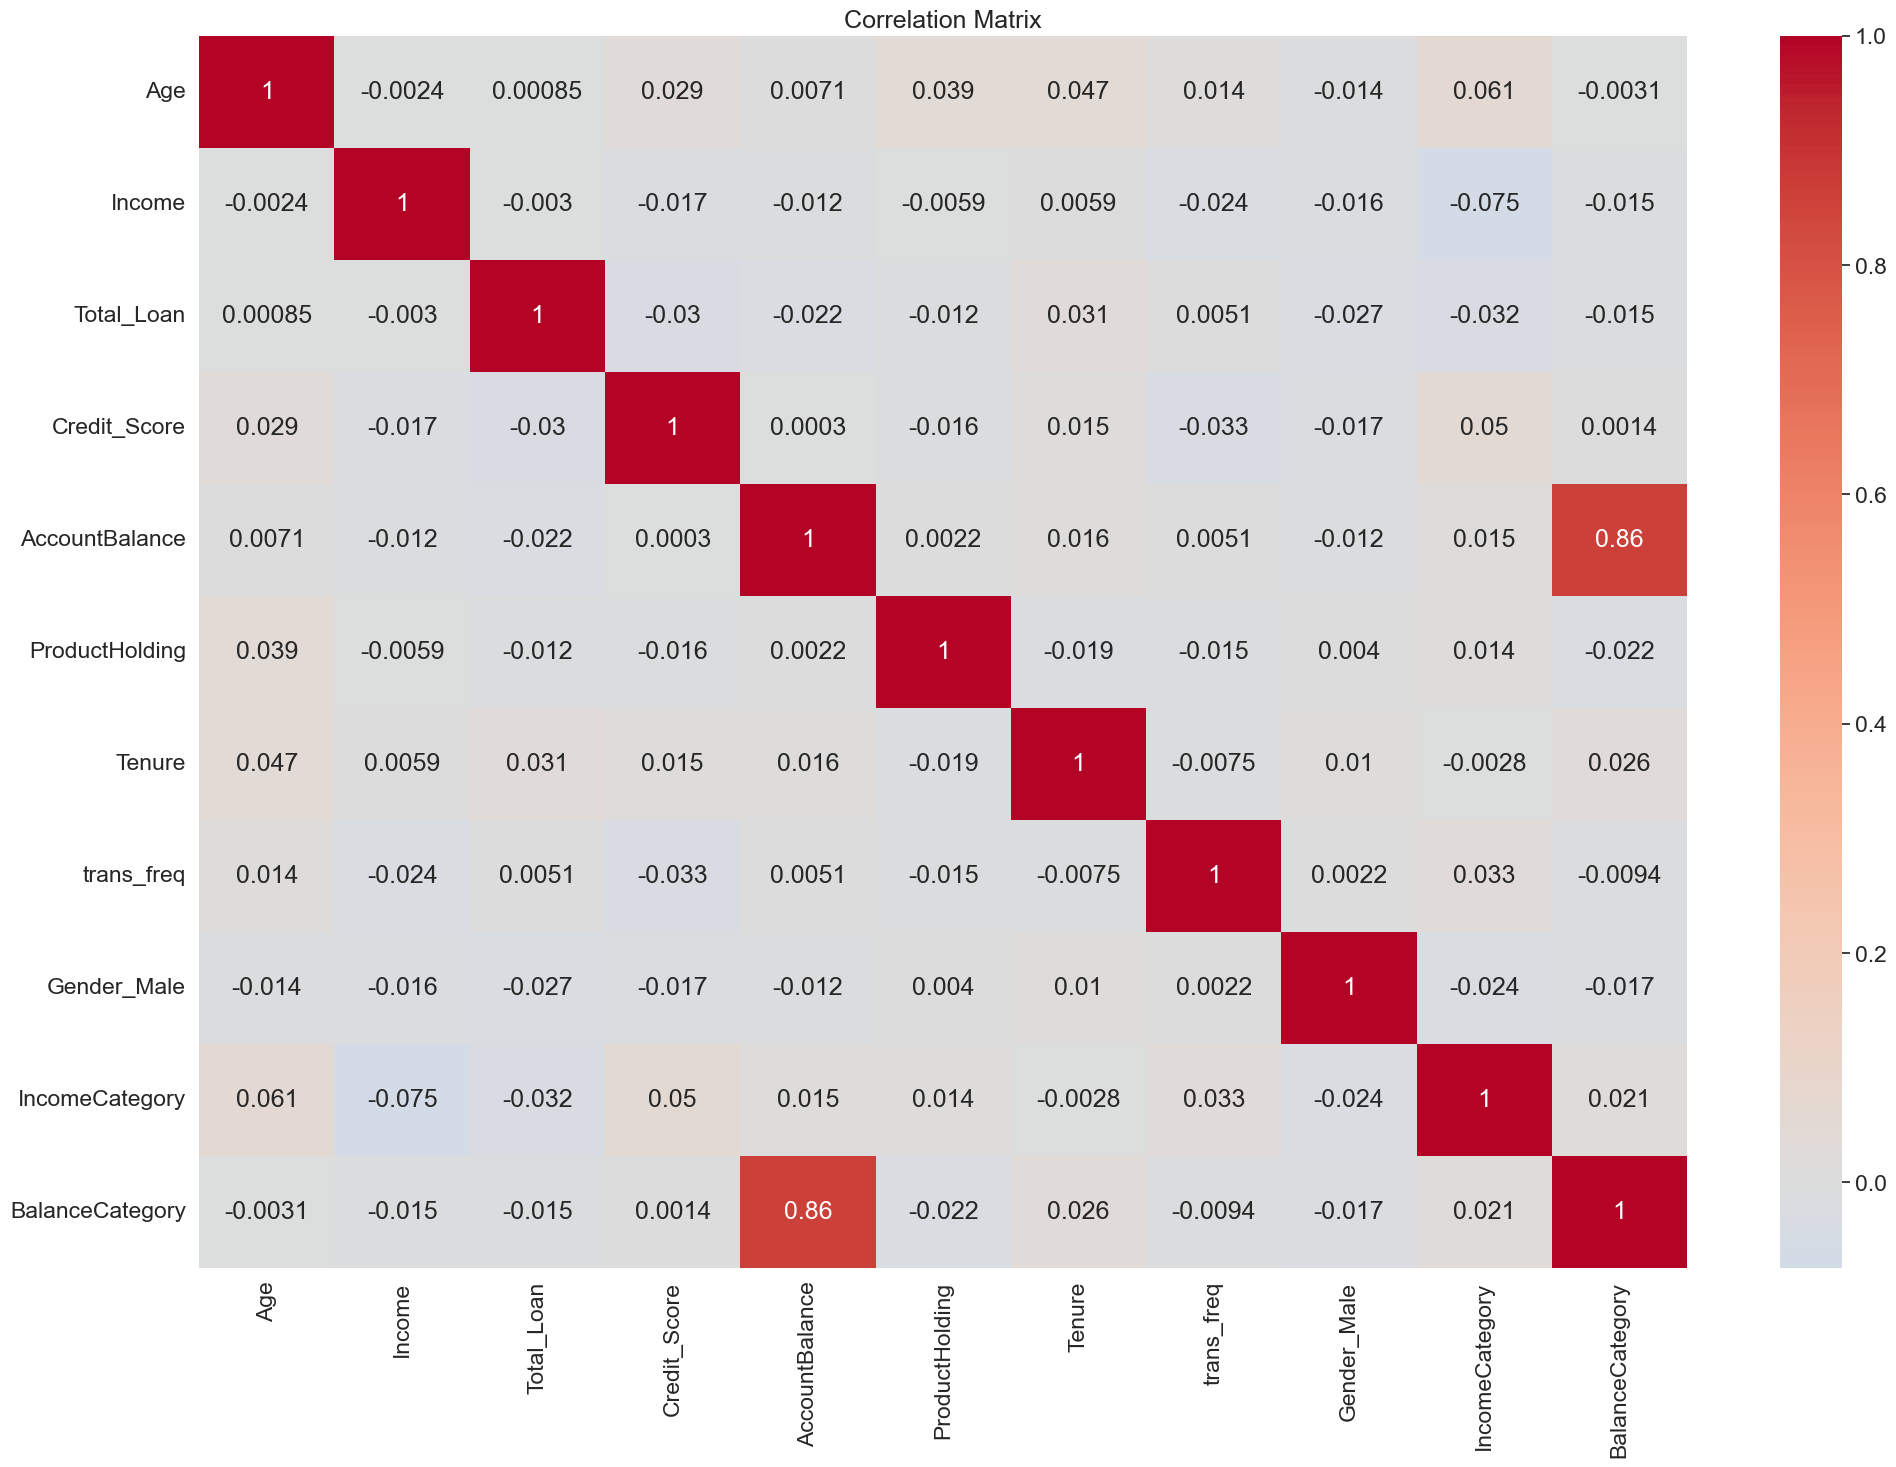

In [53]:
df1 = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = df1.corr()
plt.figure(figsize=(24, 16))
# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [54]:
df

Age   Income  Total_Loan  Credit_Score  AccountBalance  ProductHolding  \
0      62   100791           4           721           54079               3   
1      65   992878           3           726          298733               3   
2      18   961530           3           432          160354               3   
3      21  1063618           1           627          328736               2   
4      21   715106           0           849          118574               3   
...   ...      ...         ...           ...             ...             ...   
1995   30   774958           2           630           93325               3   
1996   63   444580           4           757          179214               1   
1997   25  1034581           4           318          450162               3   
1998   65   897036           2           654          366090               3   
1999   64   395729           0           511          241980               4   

      Tenure  trans_freq  Gender_Male  IncomeCategory  BalanceCategory  
0         19    0.979592            0             1.0              0.0  
1         14    0.836735            0             2.0              1.0  
2          4    0.163265            1             2.0              0.0  
3         19    0.367347            0             0.0              1.0  
4          7    0.714286            0             2.0              0.0  
...      ...         ...          ...             ...              ...  
1995       7    0.448980            1             2.0              0.0  
1996      19    0.265306            1             1.0              0.0  
1997      16    0.510204            1             0.0              1.0  
1998      11    0.612245            0             2.0              1.0  
1999      13    0.897959            0             1.0              0.0  

[2000 rows x 11 columns]

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [57]:
df_scaled

array([[ 1.23252076, -1.44930595,  1.423932  , ..., -0.9990005 ,
        -0.3558015 , -1.01613007],
       [ 1.43184489,  1.13571608,  0.72040828, ..., -0.9990005 ,
         1.03133885,  0.98412598],
       [-1.69089982,  1.04487822,  0.72040828, ...,  1.0010005 ,
         1.03133885, -1.01613007],
       ...,
       [-1.22581018,  1.25655987,  1.423932  , ...,  1.0010005 ,
        -1.74294184,  0.98412598],
       [ 1.43184489,  0.8579924 ,  0.01688457, ..., -0.9990005 ,
         1.03133885,  0.98412598],
       [ 1.36540351, -0.59465699, -1.39016286, ..., -0.9990005 ,
        -0.3558015 , -1.01613007]])

# PCA

In [73]:
from sklearn.decomposition import PCA
from kneed import KneeLocator
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results to DataFrame
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


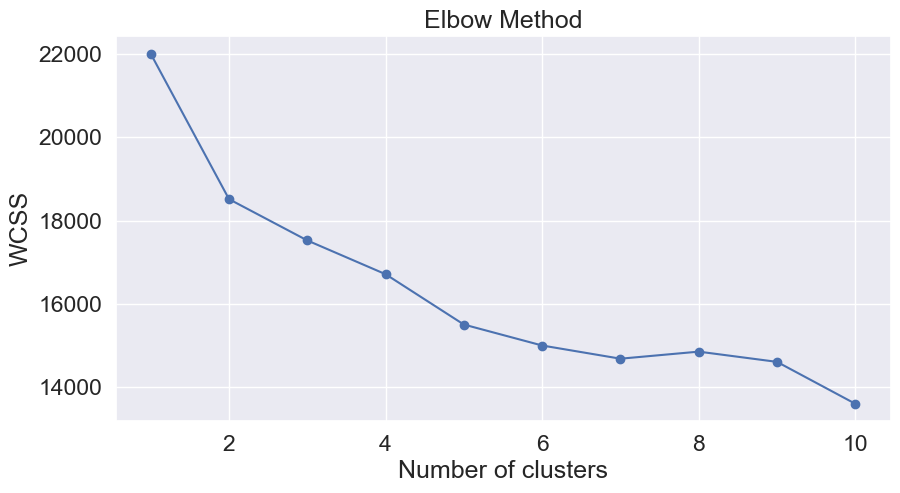

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow


In [61]:
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_pca_df['Cluster'] = kmeans_pca.fit_predict(df_pca_df)


In [62]:
df = df.join(df_pca_df)

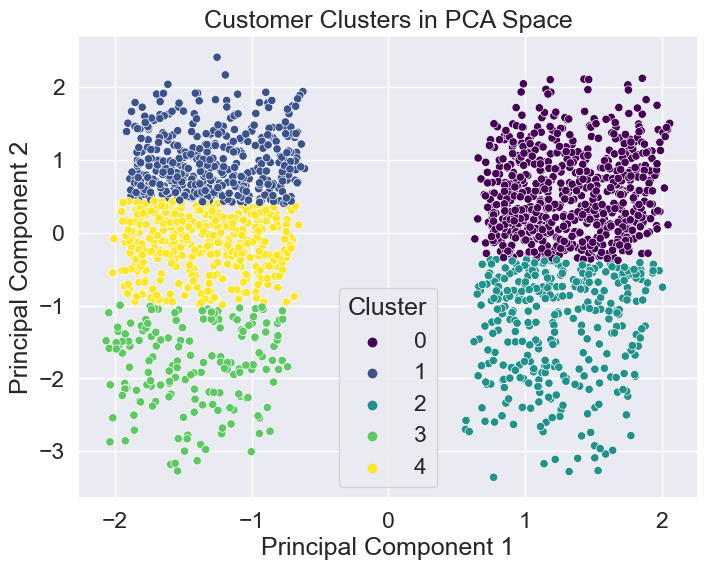

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_df, palette='viridis')
plt.title('Customer Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_avg = silhouette_score(df_pca, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.454582015844357


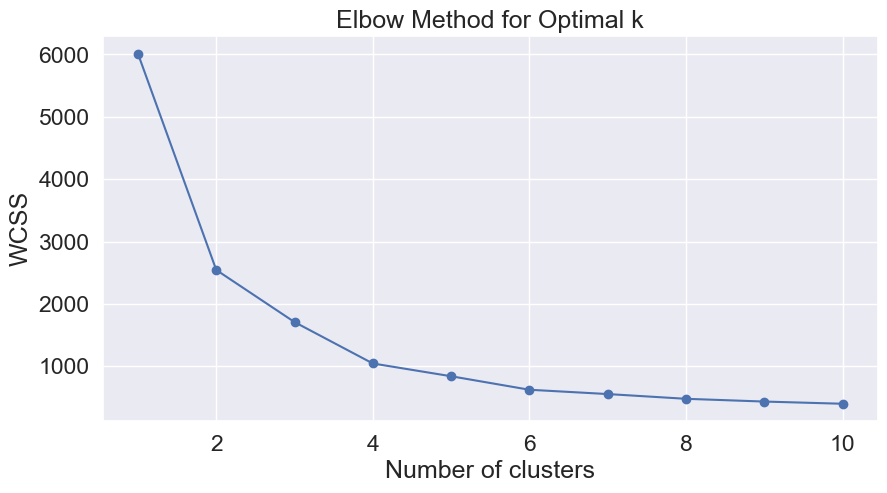

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

               Age        Income  Total_Loan  Credit_Score  AccountBalance  \
Cluster                                                                      
0        46.884058  5.186890e+05    1.801449    589.600000   369192.971014   
1        52.501229  5.262479e+05    1.783784    627.415233   123095.506143   
2        36.036810  7.590486e+05    2.279141    464.346626   369103.576687   
3        36.428571  1.024534e+06    2.297619    492.511905   126016.952381   
4        37.440098  5.140308e+05    2.088020    494.046455   119305.141809   

         ProductHolding     Tenure  trans_freq  Gender_Male  IncomeCategory  \
Cluster                                                                       
0              2.553623  10.521739    0.576989     0.459420        1.553623   
1              2.670762  10.449631    0.595898     0.442260        1.606880   
2              2.303681   9.441718    0.492112     0.558282        0.674847   
3              2.375000   9.654762    0.513362     0.62500

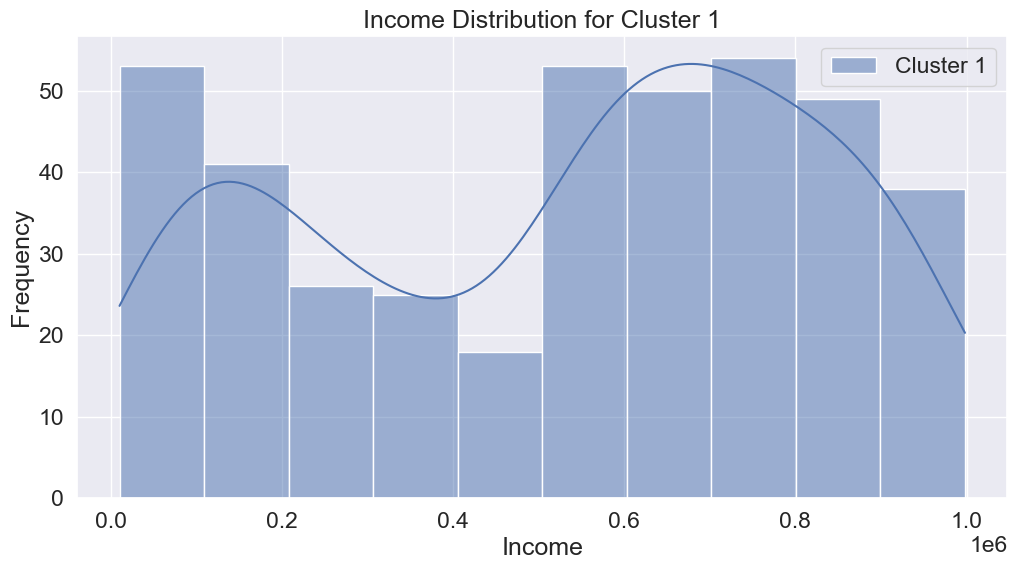

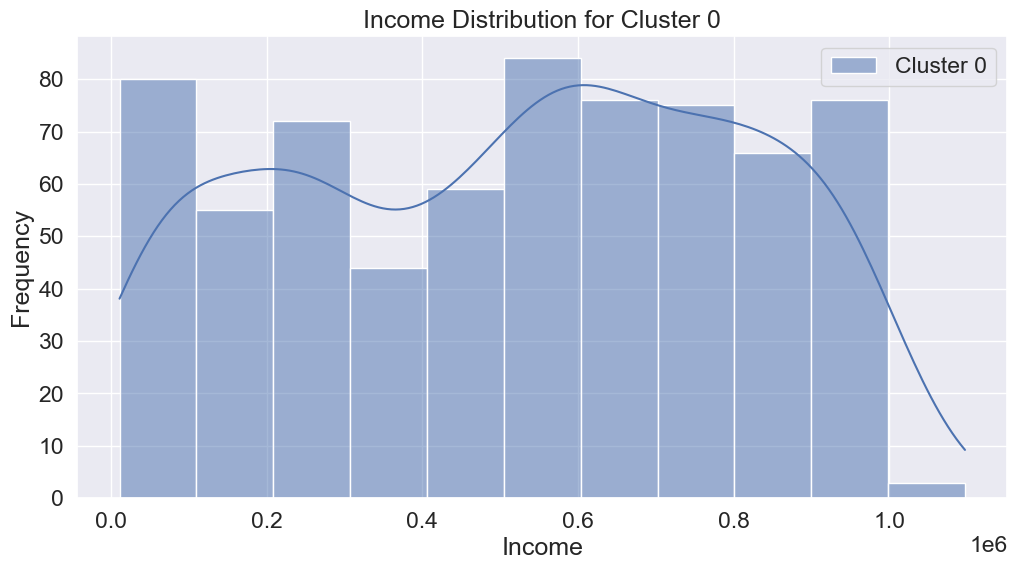

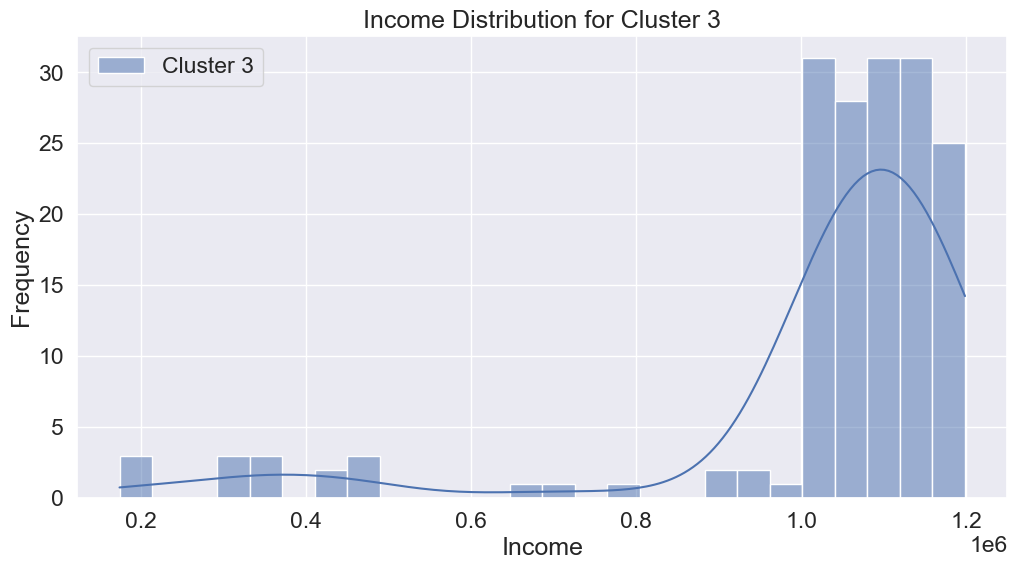

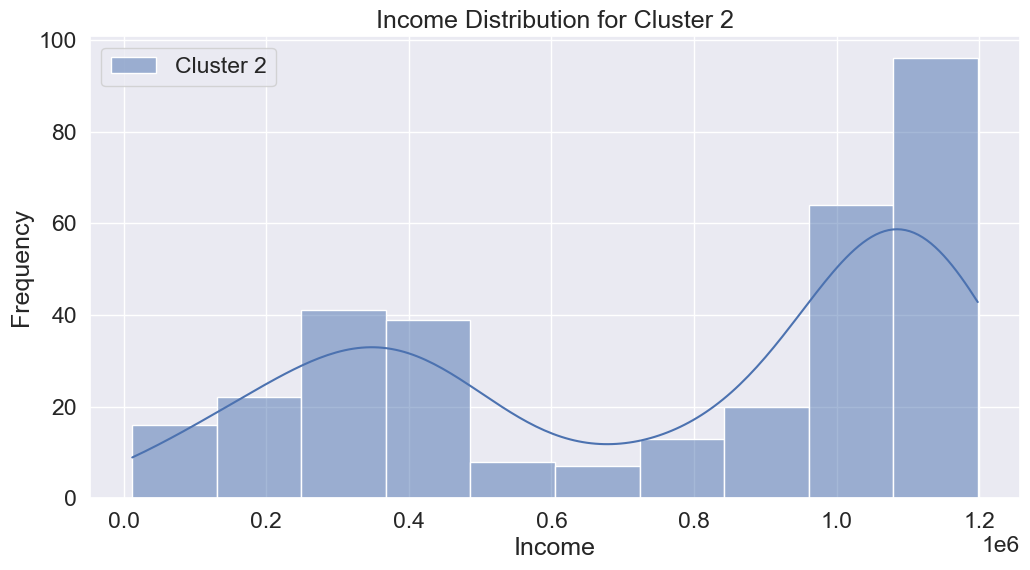

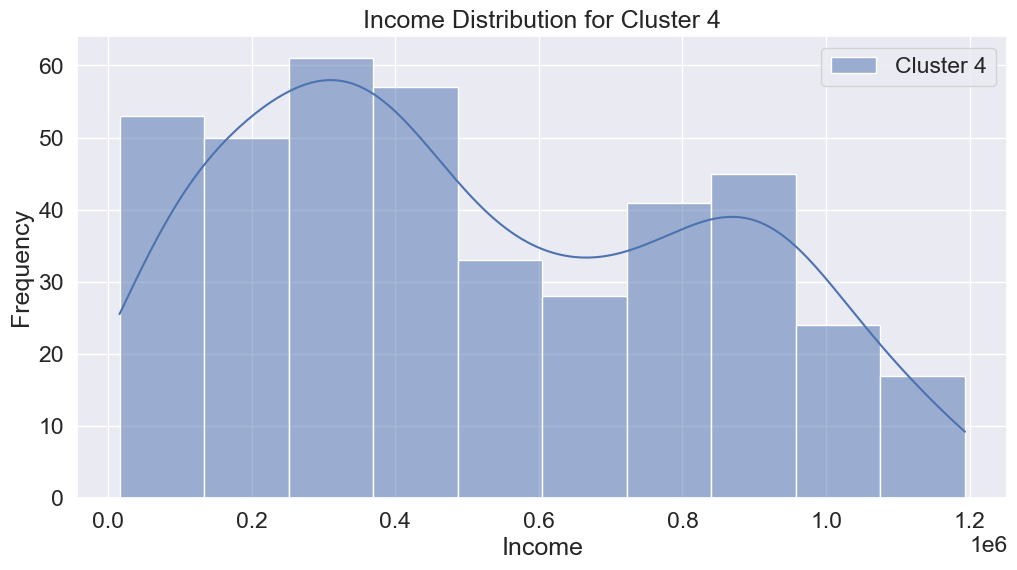

In [68]:
for cluster in df['Cluster'].unique():
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Cluster'] == cluster]['Income'], kde=True, label=f'Cluster {cluster}')
    plt.title(f'Income Distribution for Cluster {cluster}')
    plt.xlabel('Income')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

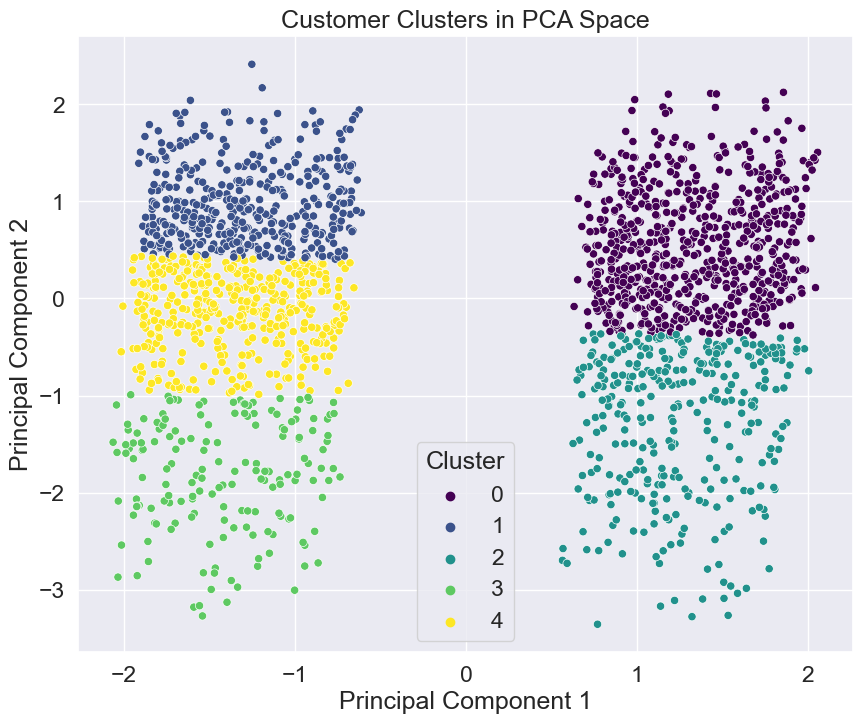

In [69]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


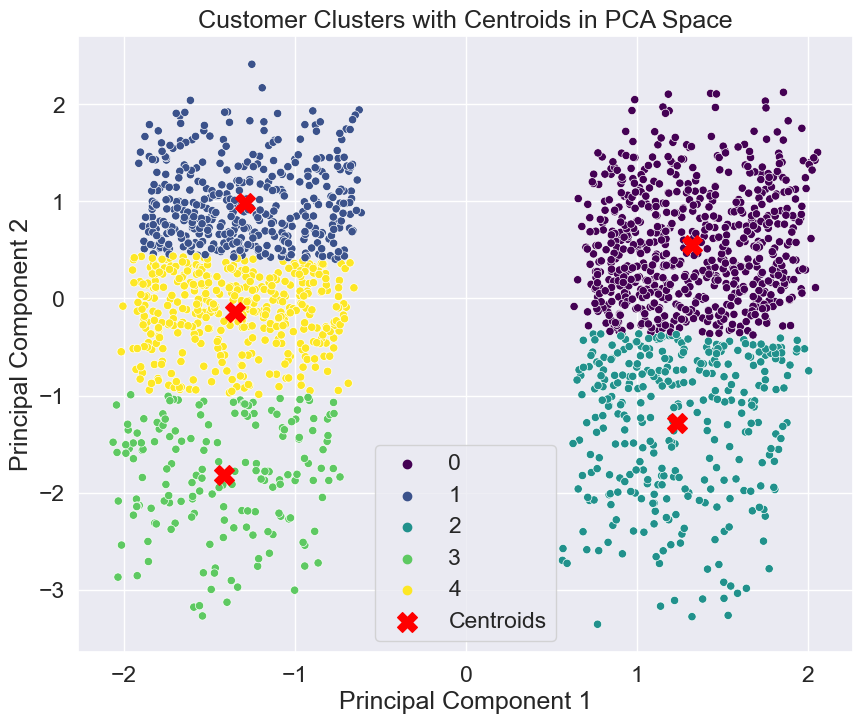

In [70]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(df_pca)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Customer Clusters with Centroids in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [71]:
cluster_profiles = df.groupby('Cluster').agg({
    'Income': ['mean', 'std'],
    'AccountBalance': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'trans_freq': ['mean', 'std']
})
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]
cluster_profiles = cluster_profiles.reset_index()
cluster_profiles['Income_mean'] = cluster_profiles['Income_mean'].apply(lambda x: "{:,.0f}".format(x))
cluster_profiles['Income_std'] = cluster_profiles['Income_std'].apply(lambda x: "{:,.0f}".format(x))
print(cluster_profiles)


   Cluster Income_mean Income_std  AccountBalance_mean  AccountBalance_std  \
0        0     518,689    291,272        369192.971014        72796.872549   
1        1     526,248    293,650        123095.506143        73647.481845   
2        2     759,049    378,328        369103.576687        71412.423316   
3        3   1,024,534    221,595        126016.952381        74632.384372   
4        4     514,031    319,626        119305.141809        73869.810368   

    Age_mean    Age_std  trans_freq_mean  trans_freq_std  
0  46.884058  13.864507         0.576989        0.258551  
1  52.501229  12.234948         0.595898        0.251566  
2  36.036810  14.160352         0.492112        0.265962  
3  36.428571  14.717122         0.513362        0.267221  
4  37.440098  13.652622         0.530612        0.259144  


<Axes: xlabel='Cluster'>

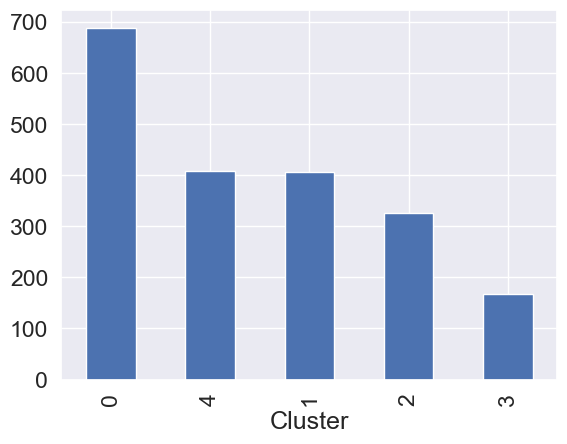

In [72]:
df['Cluster'].value_counts().plot(kind='bar')

# DBSCN

In [76]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters1 = dbscan.fit_predict(df_scaled)

In [78]:
df['Cluster1'] = clusters1

In [80]:
df_pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster1'] = clusters1

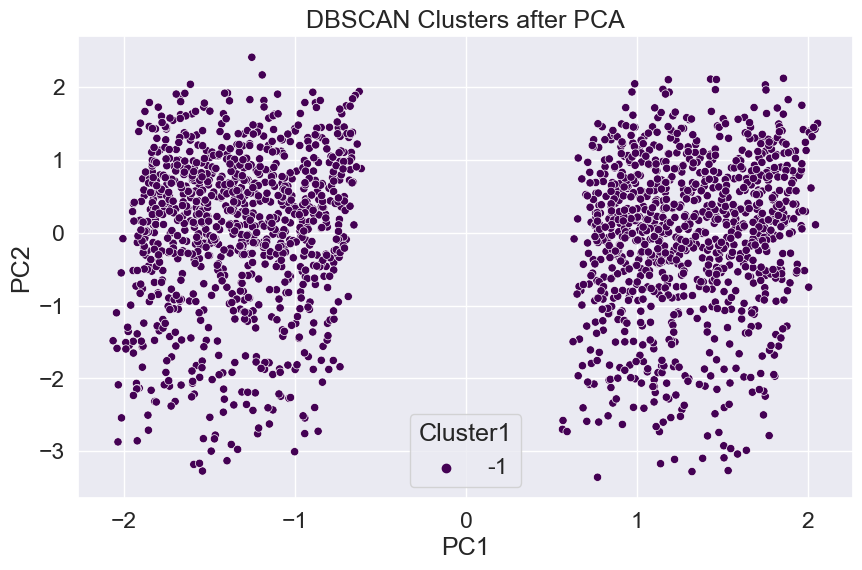

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster1', data=df_pca_df, palette='viridis')
plt.title('DBSCAN Clusters after PCA')
plt.show()

In [84]:
silhouette_avg = silhouette_score(df_scaled, clusters1)
print(f"Silhouette Score: {silhouette_avg}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)